In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import glob

import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

https://support.10xgenomics.com/single-cell-vdj/software/pipelines/latest/output/annotation

___
# Load data

In [5]:
fastq_folders = [
    "../COH_data/alignment_v2/raw/VDJ/FT-SE6453",
    "../COH_data/alignment_v2/raw/VDJ/SE7663",
    "../COH_data/alignment_v2/raw/VDJ/SE8002",
    "../COH_data/alignment_v2/raw/VDJ/FT-SA58161"
]

outfolder = "../COH_data/alignment_v2/raw/VDJ_cellranger_results"

In [6]:
raw_data_meta = pd.read_excel("../COH_data/alignment_v2/raw/VDJ/PSCA17483_VDJ_metadata.xls")
raw_data_meta

library_id sample_name  \
0    SE6453_SA71967        PB_A   
1    SE6453_SA71968        PB_B   
2    SE6453_SA71969        PB_C   
3    SE6453_SA71970        PB_D   
4    SE6453_SA71971        PB_E   
5    SE6453_SA71972        PB_F   
6    SE6453_SA71973        PB_G   
7    SE6453_SA71974        PB_H   
8    SE6453_SA71975        PB_I   
9    SE6453_SA71976      CART_J   
10  SE7663_SA134624      CART_K   
11  SE7663_SA134625      CART_L   
12  SE8002_SA157955        PB_M   
13  SE8002_SA157956        PB_N   
14  SE8002_SA157957        PB_O   
15  SE8002_SA157958        PB_P   
16  SE8002_SA157959        PB_Q   
17  SE8002_SA157960        PB_R   
18  SE8002_SA157961        PB_S   
19   SE6081_SA58161   PSCA_CART   

                                           fastq_path              upn  
0   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      375_376_393  
1   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      375_388_393  
2   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      376_388_403  
3   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      393_403_406  
4   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      376_388_406  
5   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      376_393_406  
6   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      375_403_406  
7   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      375_403_406  
8   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          388_406  
9   /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          403_406  
10  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      454_455_504  
11  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...      394_531_555  
12  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          388_394  
13  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          375_388  
14  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          375_388  
15  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          388_394  
16  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          388_394  
17  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          375_394  
18  /net/isi-dcnl/ifs/user_data/sforman/TCTRL/psca...          375_388  
19                   FT-SA58161-FT-SPN00803_HC2C2CCX2  375_376_388_393

In [7]:
dfs = []
for fastq_folder in fastq_folders:
    for folder in glob.glob(f"{fastq_folder}/FT-*/"):
        library_id = "_".join(glob.glob(f"{folder}/*")[0].split("/")[-1].split("_")[:2])
        print(library_id)
        
        df = pd.read_csv(f"{outfolder}/{library_id}/outs/filtered_contig_annotations.csv")
        df["library_id"] = library_id
        df["sample_name"] = raw_data_meta[raw_data_meta["library_id"]==library_id]["sample_name"].values[0]
        
        df["sample"] = [sn.split("_")[1] for sn in df["sample_name"]]
        df["tissue"] = [sn.split("_")[0] for sn in df["sample_name"]]
        
        dfs.append(df)

SE6453_SA71976
SE6453_SA71968
SE6453_SA71972
SE6453_SA71969
SE6453_SA71967
SE6453_SA71973
SE6453_SA71975
SE6453_SA71974
SE6453_SA71970
SE6453_SA71971
SE7663_SA134625
SE7663_SA134624
SE8002_SA157957
SE8002_SA157959
SE8002_SA157961
SE8002_SA157955
SE8002_SA157960
SE8002_SA157956
SE8002_SA157958
SE6081_SA58161


### Add patient/donor information

In [ ]:
# datasets_id_mapping = glob.glob("../COH_data/filtered_barcodes/*/patient_mapping/*_donor_ids.csv")
datasets_id_mapping = glob.glob("../COH_data/alignment_v2/raw/VDJ_patient_mapping/*_donor_ids.csv")

In [9]:
len(datasets_id_mapping)

20

In [10]:
len(dfs)

20

In [11]:
dfs_donor = []
for df in dfs:
    # Remove "-1" from barcodes
    df["cell_barcode"] = [bc.split("-")[0] for bc in df["barcode"]]
    
    print(df["sample_name"][0])
    
    # Find filepath to barcode-donor mapping returned by Vireo
    id_map = None
    for dataset_ in datasets_id_mapping:
        dataset = dataset_.split("/")[-1]
        # if f"_{df['tissue'][0]}_" in dataset and f"_{df['sample'][0]}_" in dataset:
        if f"_{df['sample_name'][0]}_" in dataset:
            id_map = pd.read_csv(dataset_)
            print(dataset)
    
    # Add donor IDs to AnnData object
    dfs_donor.append(
        df.merge(id_map, on="cell_barcode", how="left")
        .rename(columns={"donor_id": "donor"})
    )

CART_J
UPN403_406_CART_J_X5SCR_SE6439_SA71771_donor_ids.csv
PB_B
UPN375_388_393_PB_B_X5SCR_SE6452_SA71978_donor_ids.csv
PB_F
UPN376_393_406_PB_F_X5SCR_SE6435_SA71769_donor_ids.csv
PB_C
UPN376_388_403_PB_C_X5SCR_SE6452_SA71979_donor_ids.csv
PB_A
UPN375_376_393_PB_A_X5SCR_SE6452_SA71977_donor_ids.csv
PB_G
UPN375_403_406_PB_G_X5SCR_SE6436_SA71767_donor_ids.csv
PB_I
UPN388_406_PB_I_X5SCR_SE6438_SA71770_donor_ids.csv
PB_H
UPN375_403_406_PB_H_X5SCR_SE6437_SA71768_donor_ids.csv
PB_D
UPN393_403_406_PB_D_X5SCR_SE6452_SA71980_donor_ids.csv
PB_E
UPN376_388_406_PB_E_X5SCR_SE6452_SA71981_donor_ids.csv
CART_L
UPN394_531_555_CART_L_X5SCR_SE7662_SA134623_donor_ids.csv
CART_K
UPN454_455_504_CART_K_X5SCR_SE7661_SA134622_donor_ids.csv
PB_O
UPN375_388_PB_O_X5SCR_SE8003_SA157964_donor_ids.csv
PB_Q
UPN388_394_PB_Q_X5SCR_SE8003_SA157966_donor_ids.csv
PB_S
UPN375_388_PB_S_X5SCR_SE8003_SA157968_donor_ids.csv
PB_M
UPN388_394_PB_M_X5SCR_SE8003_SA157962_donor_ids.csv
PB_R
UPN375_394_PB_R_X5SCR_SE8003_SA157967_don

### Concatenate data frames

In [12]:
df_all = pd.concat(dfs_donor, ignore_index=True)

In [13]:
len(df_all)

65942

In [14]:
df_all["donor"].unique()

array(['doublet', 'unassigned', '403', '406', '375', '388', '393', 393,
       376, '376', '555', '531', '394', '504', '454', '455'], dtype=object)

!!! Note: Cell barcodes might not be unique here if one cell has several clonotypes.

All results are high confidence, full length and productive:

In [15]:
len(df_all[(df_all["high_confidence"] == True) & (df_all["full_length"] == True) & (df_all["productive"] == True)])

65942

In [16]:
# Number of unique cells (libraries might share same barcode)
df_all["barcode_+_library_id"] = df_all["cell_barcode"] + df_all["library_id"]

len(df_all[(df_all["donor"]!="doublet") & (df_all["donor"]!="unassigned")]["barcode_+_library_id"].unique())

24510

In [17]:
len(df_all[df_all["donor"]=="388"]["barcode_+_library_id"].unique())

4913

In [18]:
df_all.columns

Index(['barcode', 'is_cell', 'contig_id', 'high_confidence', 'length', 'chain',
       'v_gene', 'd_gene', 'j_gene', 'c_gene', 'full_length', 'productive',
       'fwr1', 'fwr1_nt', 'cdr1', 'cdr1_nt', 'fwr2', 'fwr2_nt', 'cdr2',
       'cdr2_nt', 'fwr3', 'fwr3_nt', 'cdr3', 'cdr3_nt', 'fwr4', 'fwr4_nt',
       'reads', 'umis', 'raw_clonotype_id', 'raw_consensus_id',
       'exact_subclonotype_id', 'library_id', 'sample_name', 'sample',
       'tissue', 'cell_barcode', 'donor', 'barcode_+_library_id'],
      dtype='object')

#### !!! raw_clonotype_id will repeat between samples and is not comparable since the libraries were aligned separate (https://www.biostars.org/p/383217/)

In [19]:
df_all

barcode  is_cell                    contig_id  \
0      AAACCTGAGCGCTTAT-1     True  AAACCTGAGCGCTTAT-1_contig_1   
1      AAACCTGAGCGCTTAT-1     True  AAACCTGAGCGCTTAT-1_contig_2   
2      AAACCTGAGGAGCGAG-1     True  AAACCTGAGGAGCGAG-1_contig_1   
3      AAACCTGAGGAGCGAG-1     True  AAACCTGAGGAGCGAG-1_contig_2   
4      AAACCTGAGTAGATGT-1     True  AAACCTGAGTAGATGT-1_contig_1   
...                   ...      ...                          ...   
65937  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_1   
65938  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_2   
65939  TTTGTCATCGTATCAG-1     True  TTTGTCATCGTATCAG-1_contig_1   
65940  TTTGTCATCGTATCAG-1     True  TTTGTCATCGTATCAG-1_contig_2   
65941  TTTGTCATCTTGTATC-1     True  TTTGTCATCTTGTATC-1_contig_1   

       high_confidence  length chain    v_gene d_gene   j_gene c_gene  \
0                 True     472   TRB     TRBV2    NaN  TRBJ2-5  TRBC2   
1                 True     473   TRA     TRAV2    NaN   TRAJ20   TRAC   
2                 True     473   TRB  TRBV11-3  TRBD1  TRBJ1-4  TRBC1   
3                 True     450   TRA   TRAV9-2    NaN   TRAJ15   TRAC   
4                 True     466   TRB  TRBV29-1  TRBD1  TRBJ1-1  TRBC1   
...                ...     ...   ...       ...    ...      ...    ...   
65937             True     467   TRA    TRAV35    NaN   TRAJ24   TRAC   
65938             True     534   TRB   TRBV7-9    NaN  TRBJ2-1  TRBC2   
65939             True     473   TRA    TRAV35    NaN   TRAJ20   TRAC   
65940             True     541   TRB  TRBV11-2  TRBD2  TRBJ2-1  TRBC2   
65941             True     502   TRB   TRBV7-2    NaN  TRBJ2-7  TRBC2   

       full_length  productive                        fwr1  \
0             True        True  EPEVTQTPSHQVTQMGQEVILRCVPI   
1             True        True   KDQVFQPSTVASSEGAVVEIFCNHS   
2             True        True  EAGVVQSPRYKIIEKKQPVAFWCNPI   
3             True        True  GNSVTQMEGPVTLSEEAFLTINCTYT   
4             True        True  SAVISQKPSRDICQRGTSLTIQCQVD   
...            ...         ...                         ...   
65937         True        True  GQQLNQSPQSMFIQEGEDVSMNCTSS   
65938         True        True  DTGVSQNPRHKITKRGQNVTFRCDPI   
65939         True        True  GQQLNQSPQSMFIQEGEDVSMNCTSS   
65940         True        True  EAGVAQSPRYKIIEKRQSVAFWCNPI   
65941         True        True  GAGVSQSPSNKVTEKGKDVELRCDPI   

                                                 fwr1_nt    cdr1  \
0      GAACCTGAAGTCACCCAGACTCCCAGCCATCAGGTCACACAGATGG...   SNHLY   
1      AAGGACCAAGTGTTTCAGCCTTCCACAGTGGCATCTTCAGAGGGAG...  VSNAYN   
2      GAAGCTGGAGTGGTTCAGTCTCCCAGATATAAGATTATAGAGAAAA...   SGHNT   
3      GGAAATTCAGTGACCCAGATGGAAGGGCCAGTGACTCTCTCAGAAG...  ATGYPS   
4      AGTGCTGTCATCTCTCAAAAGCCAAGCAGGGATATCTGTCAACGTG...   SQVTM   
...                                                  ...     ...   
65937  GGTCAACAGCTGAATCAGAGTCCTCAATCTATGTTTATCCAGGAAG...   SIFNT   
65938  GATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGG...   SEHNR   
65939  GGTCAACAGCTGAATCAGAGTCCTCAATCTATGTTTATCCAGGAAG...   SIFNT   
65940  GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAA...   SGHAT   
65941  GGAGCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGG...   SGHTA   

                  cdr1_nt               fwr2  \
0         TCTAATCACTTATAC  FYWYRQILGQKVEFLVS   
1      GTGTCCAATGCTTACAAC  FFWYLHFPGCAPRLLVK   
2         TCTGGCCACAATACC  LYWYRQNLGQGPELLIR   
3      GCCACAGGATACCCTTCC  LFWYVQYPGEGLQLLLK   
4         AGCCAAGTCACCATG  MFWYRQQPGQSLTLIAT   
...                   ...                ...   
65937     AGCATATTTAACACC  WLWYKQDPGEGPVLLIA   
65938     TCTGAACACAACCGC  LYWYRQTLGQGPEFLTY   
65939     AGCATATTTAACACC  WLWYKQEPGEGPVLLIA   
65940     TCTGGCCATGCTACC  LYWYQQILGQGPKLLIQ   
65941     TCAGGTCATACTGCC  LYWYRQSLGQGLEFLIY   

                                                 fwr2_nt     cdr2  \
0      TTCTATTGGTACAGACAAATCTTGGGGCAGAAAGTCGAGTTTCTGG...   FYNNEI   
1      TTCTTCTGGTACCTTCACTTCCCGGGATGTGCACCAAGACTCCTTG...   

### Save barcodes to redo Verio mapping:

In [20]:
# vdj_verio_out = "../COH_data/alignment_v2/raw/VDJ_cellranger_results"

# for library_id in df_all["library_id"].unique():
#     with open(f"{vdj_verio_out}/{library_id}_barcodes_verio.txt", "w") as bc_file:
#         for cell_barcode in df_all[df_all["library_id"]==library_id]["cell_barcode"].unique():
#             bc_file.write(cell_barcode + "\n")

### Add timepoint metadata

In [21]:
metadata = pd.read_csv("../COH/IRB17483_metadata.csv")

Only keep PB data from NovaSeqS4:

In [22]:
pb_metadata = metadata[(metadata["tissue_type"]=="PB") & (metadata["sequencing_platform"]=="NovaSeqS4")]

# Convert timepoint data to integer
pb_metadata["timepoint"] = pb_metadata["timepoint"].astype(int)

pb_metadata

/tmp/ipykernel_190009/734949133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pb_metadata["timepoint"] = pb_metadata["timepoint"].astype(int)


upn  timepoint tissue_type sample_name       library_id flowcell_id  \
24   375          0          PB        PB_A   SE6452_SA71977   HJNN2DSXY   
25   376          1          PB        PB_A   SE6452_SA71977   HJNN2DSXY   
26   393         14          PB        PB_A   SE6452_SA71977   HJNN2DSXY   
30   375          1          PB        PB_B   SE6452_SA71978   HJNN2DSXY   
31   393         25          PB        PB_B   SE6452_SA71978   HJNN2DSXY   
32   388         14          PB        PB_B   SE6452_SA71978   HJNN2DSXY   
36   376          0          PB        PB_C   SE6452_SA71979   HJNN2DSXY   
37   388         28          PB        PB_C   SE6452_SA71979   HJNN2DSXY   
38   403         14          PB        PB_C   SE6452_SA71979   HJNN2DSXY   
42   393          0          PB        PB_D   SE6452_SA71980   HJNN2DSXY   
43   403          1          PB        PB_D   SE6452_SA71980   HJNN2DSXY   
44   406         28          PB        PB_D   SE6452_SA71980   HJNN2DSXY   
48   376         29          PB        PB_E   SE6452_SA71981   HJNN2DSXY   
49   388          0          PB        PB_E   SE6452_SA71981   HJNN2DSXY   
50   406         14          PB        PB_E   SE6452_SA71981   HJNN2DSXY   
54   376         14          PB        PB_F   SE6435_SA71769   HKNHWDSXY   
55   393          1          PB        PB_F   SE6435_SA71769   HKNHWDSXY   
56   406          0          PB        PB_F   SE6435_SA71769   HKNHWDSXY   
60   375         14          PB        PB_G   SE6436_SA71767   HKNHWDSXY   
61   403         28          PB        PB_G   SE6436_SA71767   HKNHWDSXY   
62   406          1          PB        PB_G   SE6436_SA71767   HKNHWDSXY   
66   375         28          PB        PB_H   SE6437_SA71768   HJNN3DSXY   
67   403          0          PB        PB_H   SE6437_SA71768   HJNN3DSXY   
68   406         60          PB        PB_H   SE6437_SA71768   HJNN3DSXY   
72   388          1          PB        PB_I   SE6438_SA71770   HJNN3DSXY   
73   406         90          PB        PB_I   SE6438_SA71770   HJNN3DSXY   
78   394         28          PB        PB_M  SE8003_SA157962   H72NVDSX5   
79   388         -6          PB        PB_M  SE8003_SA157962   H72NVDSX5   
82   375         14          PB        PB_N  SE8003_SA157963   H72NVDSX5   
83   388        224          PB        PB_N  SE8003_SA157963   H72NVDSX5   
86   375         28          PB        PB_O  SE8003_SA157964   H72NVDSX5   
87   388         14          PB        PB_O  SE8003_SA157964   H72NVDSX5   
90   388         28          PB        PB_P  SE8003_SA157965   H72NVDSX5   
91   394        -12          PB        PB_P  SE8003_SA157965   H72NVDSX5   
94   388         90          PB        PB_Q  SE8003_SA157966   H72NVDSX5   
95   394          0          PB        PB_Q  SE8003_SA157966   H72NVDSX5   
98   375         90          PB        PB_R  SE8003_SA157967   H72NVDSX5   
99   394         14          PB        PB_R  SE8003_SA157967   H72NVDSX5   
102  388          0          PB        PB_S  SE8003_SA157968   H72NVDSX5   
103  375          0          PB        PB_S  SE8003_SA157968   H72NVDSX5   

    sequencing_platform library_type  
24            NovaSeqS4        X5SCR  
25            NovaSeqS4        X5SCR  
26            NovaSeqS4        X5SCR  
30            NovaSeqS4        X5SCR  
31            NovaSeqS4        X5SCR  
32            NovaSeqS4        X5SCR  
36            NovaSeqS4        X5SCR  
37            NovaSeqS4        X5SCR  
38            NovaSeqS4        X5SCR  
42            NovaSeqS4        X5SCR  
43            NovaSeqS4        X5SCR  
44            NovaSeqS4        X5SCR  
48            NovaSeqS4        X5SCR  
49            NovaSeqS4        X5SCR  
50            NovaSeqS4        X5SCR  
54            NovaSeqS4        X5SCR  
55            NovaSeqS4        X5SCR  
56            NovaSeqS4        X5SCR  
60            NovaSeqS4        X5SCR  
61            NovaSeqS4        X5SCR  
62            NovaSeqS4        X5SCR  
66            NovaSeqS4       

In [23]:
# Add new timepoint column to adata (PB data will be overwritten, leaving only "CART" data with the "IP" timepoint label)
df_all["timepoint"] = "IP"

# Add time points based on sample and donor IDs from metadata
for index in np.arange(len(pb_metadata)):
    sample = pb_metadata.iloc[index]["sample_name"].split("_")[1]
    donor = pb_metadata.iloc[index]["upn"]
    timepoint = pb_metadata.iloc[index]["timepoint"]

    df_all.loc[(df_all["sample"]==str(sample))&(df_all["donor"]==str(donor)), "timepoint"] = timepoint

In [24]:
df_all

barcode  is_cell                    contig_id  \
0      AAACCTGAGCGCTTAT-1     True  AAACCTGAGCGCTTAT-1_contig_1   
1      AAACCTGAGCGCTTAT-1     True  AAACCTGAGCGCTTAT-1_contig_2   
2      AAACCTGAGGAGCGAG-1     True  AAACCTGAGGAGCGAG-1_contig_1   
3      AAACCTGAGGAGCGAG-1     True  AAACCTGAGGAGCGAG-1_contig_2   
4      AAACCTGAGTAGATGT-1     True  AAACCTGAGTAGATGT-1_contig_1   
...                   ...      ...                          ...   
65937  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_1   
65938  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_2   
65939  TTTGTCATCGTATCAG-1     True  TTTGTCATCGTATCAG-1_contig_1   
65940  TTTGTCATCGTATCAG-1     True  TTTGTCATCGTATCAG-1_contig_2   
65941  TTTGTCATCTTGTATC-1     True  TTTGTCATCTTGTATC-1_contig_1   

       high_confidence  length chain    v_gene d_gene   j_gene c_gene  \
0                 True     472   TRB     TRBV2    NaN  TRBJ2-5  TRBC2   
1                 True     473   TRA     TRAV2    NaN   TRAJ20   TRAC   
2                 True     473   TRB  TRBV11-3  TRBD1  TRBJ1-4  TRBC1   
3                 True     450   TRA   TRAV9-2    NaN   TRAJ15   TRAC   
4                 True     466   TRB  TRBV29-1  TRBD1  TRBJ1-1  TRBC1   
...                ...     ...   ...       ...    ...      ...    ...   
65937             True     467   TRA    TRAV35    NaN   TRAJ24   TRAC   
65938             True     534   TRB   TRBV7-9    NaN  TRBJ2-1  TRBC2   
65939             True     473   TRA    TRAV35    NaN   TRAJ20   TRAC   
65940             True     541   TRB  TRBV11-2  TRBD2  TRBJ2-1  TRBC2   
65941             True     502   TRB   TRBV7-2    NaN  TRBJ2-7  TRBC2   

       full_length  productive                        fwr1  \
0             True        True  EPEVTQTPSHQVTQMGQEVILRCVPI   
1             True        True   KDQVFQPSTVASSEGAVVEIFCNHS   
2             True        True  EAGVVQSPRYKIIEKKQPVAFWCNPI   
3             True        True  GNSVTQMEGPVTLSEEAFLTINCTYT   
4             True        True  SAVISQKPSRDICQRGTSLTIQCQVD   
...            ...         ...                         ...   
65937         True        True  GQQLNQSPQSMFIQEGEDVSMNCTSS   
65938         True        True  DTGVSQNPRHKITKRGQNVTFRCDPI   
65939         True        True  GQQLNQSPQSMFIQEGEDVSMNCTSS   
65940         True        True  EAGVAQSPRYKIIEKRQSVAFWCNPI   
65941         True        True  GAGVSQSPSNKVTEKGKDVELRCDPI   

                                                 fwr1_nt    cdr1  \
0      GAACCTGAAGTCACCCAGACTCCCAGCCATCAGGTCACACAGATGG...   SNHLY   
1      AAGGACCAAGTGTTTCAGCCTTCCACAGTGGCATCTTCAGAGGGAG...  VSNAYN   
2      GAAGCTGGAGTGGTTCAGTCTCCCAGATATAAGATTATAGAGAAAA...   SGHNT   
3      GGAAATTCAGTGACCCAGATGGAAGGGCCAGTGACTCTCTCAGAAG...  ATGYPS   
4      AGTGCTGTCATCTCTCAAAAGCCAAGCAGGGATATCTGTCAACGTG...   SQVTM   
...                                                  ...     ...   
65937  GGTCAACAGCTGAATCAGAGTCCTCAATCTATGTTTATCCAGGAAG...   SIFNT   
65938  GATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGG...   SEHNR   
65939  GGTCAACAGCTGAATCAGAGTCCTCAATCTATGTTTATCCAGGAAG...   SIFNT   
65940  GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAA...   SGHAT   
65941  GGAGCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGG...   SGHTA   

                  cdr1_nt               fwr2  \
0         TCTAATCACTTATAC  FYWYRQILGQKVEFLVS   
1      GTGTCCAATGCTTACAAC  FFWYLHFPGCAPRLLVK   
2         TCTGGCCACAATACC  LYWYRQNLGQGPELLIR   
3      GCCACAGGATACCCTTCC  LFWYVQYPGEGLQLLLK   
4         AGCCAAGTCACCATG  MFWYRQQPGQSLTLIAT   
...                   ...                ...   
65937     AGCATATTTAACACC  WLWYKQDPGEGPVLLIA   
65938     TCTGAACACAACCGC  LYWYRQTLGQGPEFLTY   
65939     AGCATATTTAACACC  WLWYKQEPGEGPVLLIA   
65940     TCTGGCCATGCTACC  LYWYQQILGQGPKLLIQ   
65941     TCAGGTCATACTGCC  LYWYRQSLGQGLEFLIY   

                                                 fwr2_nt     cdr2  \
0      TTCTATTGGTACAGACAAATCTTGGGGCAGAAAGTCGAGTTTCTGG...   FYNNEI   
1      TTCTTCTGGTACCTTCACTTCCCGGGATGTGCACCAAGACTCCTTG...   

In [25]:
df_all[df_all["donor"]=="388"]

barcode  is_cell                    contig_id  \
7368   AAATGCCCATCTGGTA-1     True  AAATGCCCATCTGGTA-1_contig_1   
7369   AAATGCCCATCTGGTA-1     True  AAATGCCCATCTGGTA-1_contig_2   
7394   ACTGCTCGTAGGCTGA-1     True  ACTGCTCGTAGGCTGA-1_contig_1   
7395   ACTGCTCGTAGGCTGA-1     True  ACTGCTCGTAGGCTGA-1_contig_2   
7417   AGGCCGTAGCTGAAAT-1     True  AGGCCGTAGCTGAAAT-1_contig_1   
...                   ...      ...                          ...   
65937  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_1   
65938  TTTGTCATCGCCATAA-1     True  TTTGTCATCGCCATAA-1_contig_2   
65939  TTTGTCATCGTATCAG-1     True  TTTGTCATCGTATCAG-1_contig_1   
65940  TTTGTCATCGTATCAG-1     True  TTTGTCATCGTATCAG-1_contig_2   
65941  TTTGTCATCTTGTATC-1     True  TTTGTCATCTTGTATC-1_contig_1   

       high_confidence  length chain      v_gene d_gene   j_gene c_gene  \
7368              True     501   TRB      TRBV14    NaN  TRBJ2-1  TRBC2   
7369              True     514   TRA  TRAV23/DV6    NaN   TRAJ28   TRAC   
7394              True     486   TRB    TRBV25-1    NaN  TRBJ2-2  TRBC2   
7395              True     502   TRA     TRAV1-2    NaN   TRAJ20   TRAC   
7417              True     558   TRA      TRAV16    NaN   TRAJ32   TRAC   
...                ...     ...   ...         ...    ...      ...    ...   
65937             True     467   TRA      TRAV35    NaN   TRAJ24   TRAC   
65938             True     534   TRB     TRBV7-9    NaN  TRBJ2-1  TRBC2   
65939             True     473   TRA      TRAV35    NaN   TRAJ20   TRAC   
65940             True     541   TRB    TRBV11-2  TRBD2  TRBJ2-1  TRBC2   
65941             True     502   TRB     TRBV7-2    NaN  TRBJ2-7  TRBC2   

       full_length  productive                        fwr1  \
7368          True        True  EAGVTQFPSHSVIEKGQTVTLRCDPI   
7369          True        True  QQQVKQSPQSLIVQKGGISIINCAYE   
7394          True        True  EADIYQTPRYLVIGTGKKITLECSQT   
7395          True        True   GQNIDQPTEMTATEGAIVQINCTYQ   
7417          True        True  AQRVTQPEKLLSVFKGAPVELKCNYS   
...            ...         ...                         ...   
65937         True        True  GQQLNQSPQSMFIQEGEDVSMNCTSS   
65938         True        True  DTGVSQNPRHKITKRGQNVTFRCDPI   
65939         True        True  GQQLNQSPQSMFIQEGEDVSMNCTSS   
65940         True        True  EAGVAQSPRYKIIEKRQSVAFWCNPI   
65941         True        True  GAGVSQSPSNKVTEKGKDVELRCDPI   

                                                 fwr1_nt    cdr1  \
7368   GAAGCTGGAGTTACTCAGTTCCCCAGCCACAGCGTAATAGAGAAGG...   SGHDN   
7369   CAGCAGCAGGTGAAACAAAGTCCTCAATCTTTGATAGTCCAGAAAG...  NTAFDY   
7394   GAAGCTGACATCTACCAGACCCCAAGATACCTTGTTATAGGGACAG...   MGHDK   
7395   GGACAAAACATTGACCAGCCCACTGAGATGACAGCTACGGAAGGTG...  TSGFNG   
7417   GCCCAGAGAGTGACTCAGCCCGAGAAGCTCCTCTCTGTCTTTAAAG...  YSGSPE   
...                                                  ...     ...   
65937  GGTCAACAGCTGAATCAGAGTCCTCAATCTATGTTTATCCAGGAAG...   SIFNT   
65938  GATACTGGAGTCTCCCAGAACCCCAGACACAAGATCACAAAGAGGG...   SEHNR   
65939  GGTCAACAGCTGAATCAGAGTCCTCAATCTATGTTTATCCAGGAAG...   SIFNT   
65940  GAAGCTGGAGTTGCCCAGTCTCCCAGATATAAGATTATAGAGAAAA...   SGHAT   
65941  GGAGCTGGAGTCTCCCAGTCCCCCAGTAACAAGGTCACAGAGAAGG...   SGHTA   

                  cdr1_nt               fwr2  \
7368      TCTGGACATGATAAT  LYWYRRVMGKEIKFLLH   
7369   AACACTGCGTTTGACTAC  FPWYQQFPGKGPALLIA   
7394      ATGGGCCATGACAAA  MYWYQQDPGMELHLIHY   
7395   ACATCTGGGTTCAACGGG  LFWYQQHAGEAPTFLSY   
7417   TATTCTGGGAGTCCTGAA  LFWYVQYSRQRLQLLLR   
...                   ...                ...   
65937     AGCATATTTAACACC  WLWYKQDPGEGPVLLIA   
65938     TCTGAACACAACCGC  LYWYRQTLGQGPEFLTY   
65939     AGCATATTTAACACC  WLWYKQEPGEGPVLLIA   
65940     TCTGGCCATGCTACC  LYWYQQILGQGPKLLIQ   
65941     TCAGGTCATACTGCC  LYWYRQSLGQGLEFLIY   

                                                 fwr2_nt     cdr2  \
7368   CTTTATTGGTATCGACGTGTTATGGGAAAAGAAATAAAATTTCTGT...   FVKESK   
7369   TTTCCATGGTACCAACAATTCCCTGGGA

___

# Plot

In [26]:
df = (
    df_all.groupby(["donor", "timepoint"])["cdr3"].nunique().unstack().fillna(0)
)
df["total_count"] = df.sum(axis=1).values
df

timepoint     -12    -6       0      1     14    25     28      90    224  \
donor                                                                       
376           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
393           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
375           0.0   0.0  1600.0  149.0  336.0   0.0  120.0  1763.0    0.0   
376           0.0   0.0     8.0   68.0    0.0   0.0    0.0     0.0    0.0   
388           0.0  33.0   282.0    3.0  379.0   0.0  416.0   616.0  464.0   
393           0.0   0.0     0.0    0.0   70.0  71.0    0.0     0.0    0.0   
394         106.0   0.0   357.0    0.0  196.0   0.0  457.0     0.0    0.0   
403           0.0   0.0     0.0    0.0    0.0   0.0   27.0     0.0    0.0   
406           0.0   0.0     0.0    0.0    0.0   0.0    0.0    38.0    0.0   
454           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
455           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
504           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
531           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
555           0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
doublet       0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   
unassigned    0.0   0.0     0.0    0.0    0.0   0.0    0.0     0.0    0.0   

timepoint       IP  total_count  
donor                            
376           18.0         18.0  
393           26.0         26.0  
375         3251.0       7219.0  
376         2374.0       2450.0  
388         3265.0       5458.0  
393         3550.0       3691.0  
394         2713.0       3829.0  
403         1164.0       1191.0  
406         1668.0       1706.0  
454         2380.0       2380.0  
455         1214.0       1214.0  
504         2915.0       2915.0  
531         3065.0       3065.0  
555         4354.0       4354.0  
doublet     7889.0       7889.0  
unassigned  3268.0       3268.0

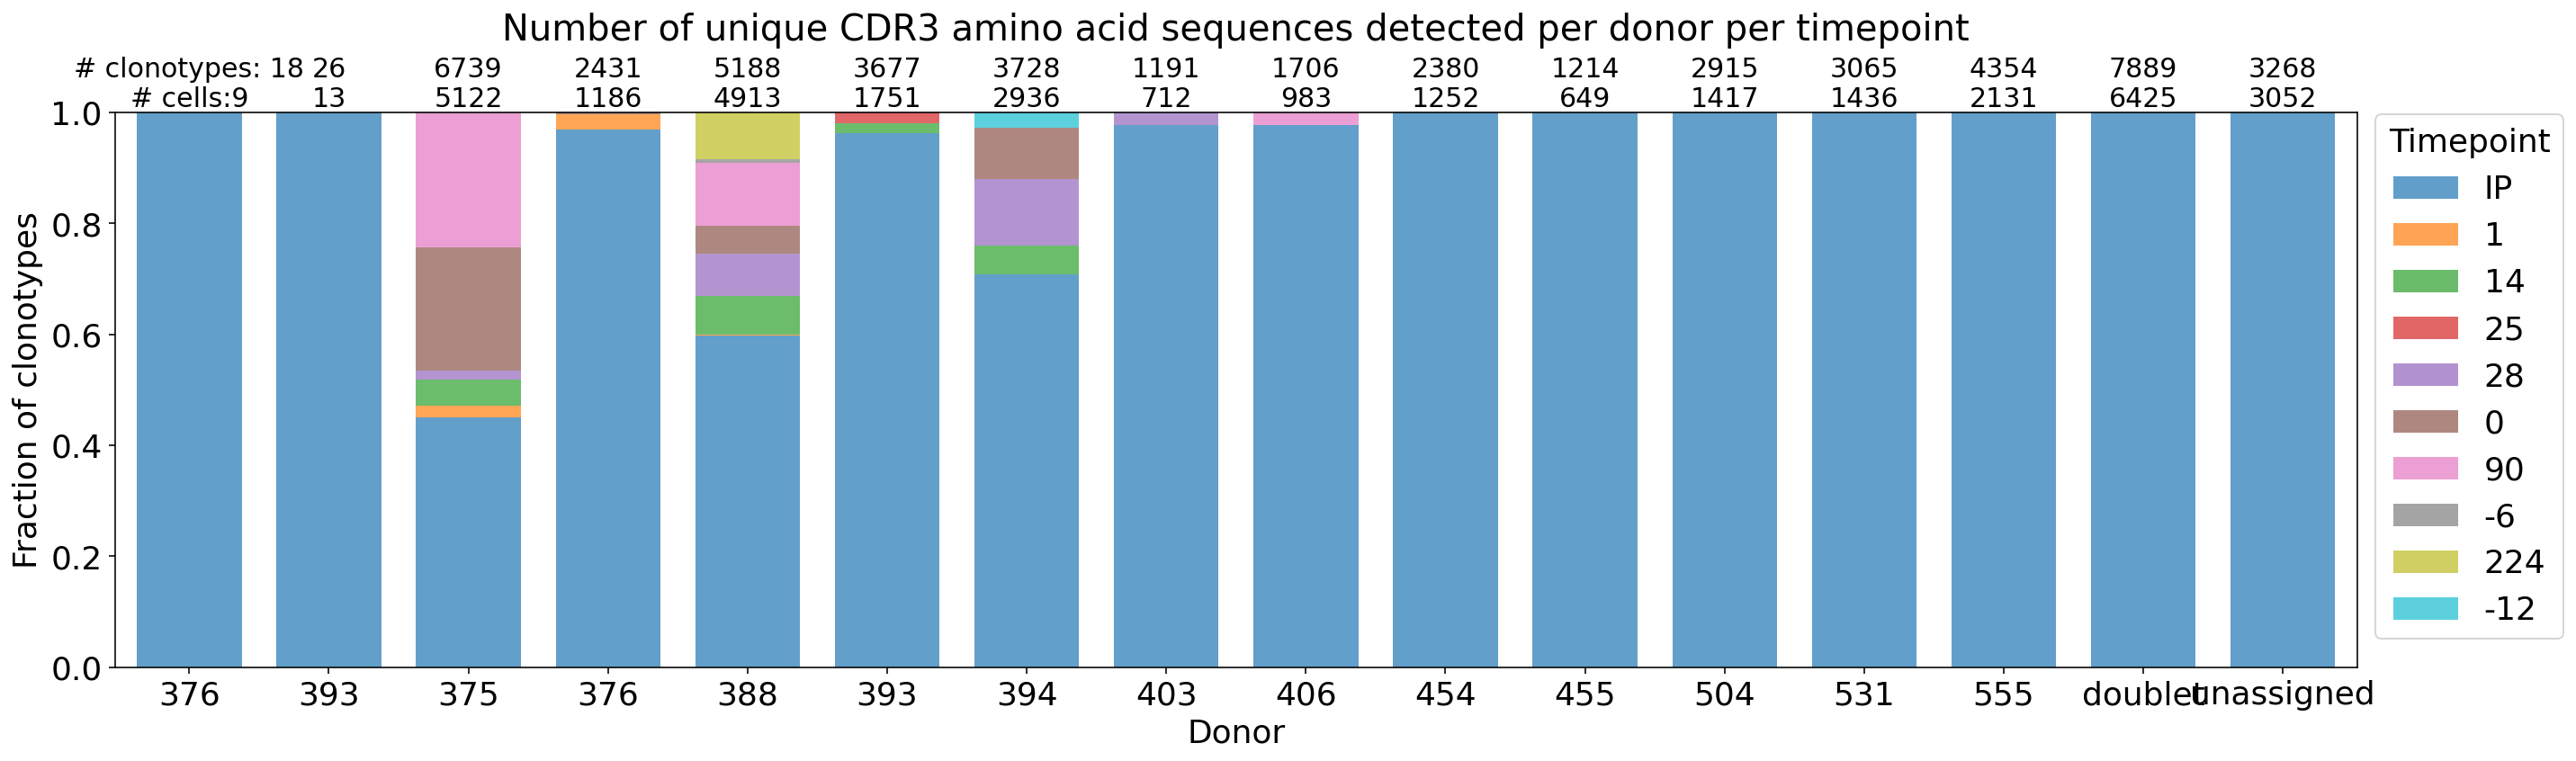

In [27]:
# Get raw clonotype counts and fractions per timepoint per donor
df = (
    df_all.groupby(["donor", "timepoint"])["cdr3"].nunique().unstack().fillna(0)
)
df["total_count"] = df.sum(axis=1).values

for sample in df.columns[:-1]:
    df[f"{sample}_fraction"] = (
        df[sample] / df["total_count"]
    ).values

# Get total clonotype count
clonocounts = (
    df_all.groupby("donor")["cdr3"].nunique().values
)

# Get cellcounts
cellcounts = []
for donor in df.index.values:
    cellcounts.append(len(df_all[df_all["donor"]==donor]["barcode_+_library_id"].unique()))

## Plot
fig, ax = plt.subplots(figsize=(20, 6))
width = 0.75
alpha = 0.7
fontsize = 18

clusters = df.index.values

previous_samples = 0
for sample in df_all["timepoint"].unique():
    ax.bar(
        np.arange(len(clusters)),
        df[f"{sample}_fraction"].values,
        width,
        bottom=previous_samples,
        # color=colors[0],
        label=sample,
        alpha=alpha,
    )
    previous_samples = previous_samples + df[f"{sample}_fraction"].values

# Add value above each bar
for index, cellcount in enumerate(cellcounts):
    if index == 0:
        ax.text(x=index, y=1.01, s=f"# clonotypes: {clonocounts[index]}\n# cells:{cellcount}", size=fontsize - 3, ha="center")
    else:
        ax.text(x=index, y=1.01, s=f"{clonocounts[index]}\n{cellcount}", size=fontsize - 3, ha="center")

ax.set_xticks(np.arange(len(clusters)), clusters)

ax.legend(bbox_to_anchor=(1.001, 1.025), loc="upper left", title="Timepoint", fontsize=fontsize, title_fontsize=fontsize)

ax.set_title("Number of unique CDR3 amino acid sequences detected per donor per timepoint", y=1.0, pad=40, fontsize=fontsize + 2)
ax.set_ylabel("Fraction of clonotypes", fontsize=fontsize)
ax.set_xlabel("Donor", fontsize=fontsize)
ax.tick_params(axis="both", labelsize=fontsize)

ax.margins(x=0.01, y=0.06)
ax.grid(False)

plt.tight_layout()

fig.show()

### Clonotypes per cellcount in IP

In [28]:
df_all["donor"].unique()

array(['doublet', 'unassigned', '403', '406', '375', '388', '393', 393,
       376, '376', '555', '531', '394', '504', '454', '455'], dtype=object)

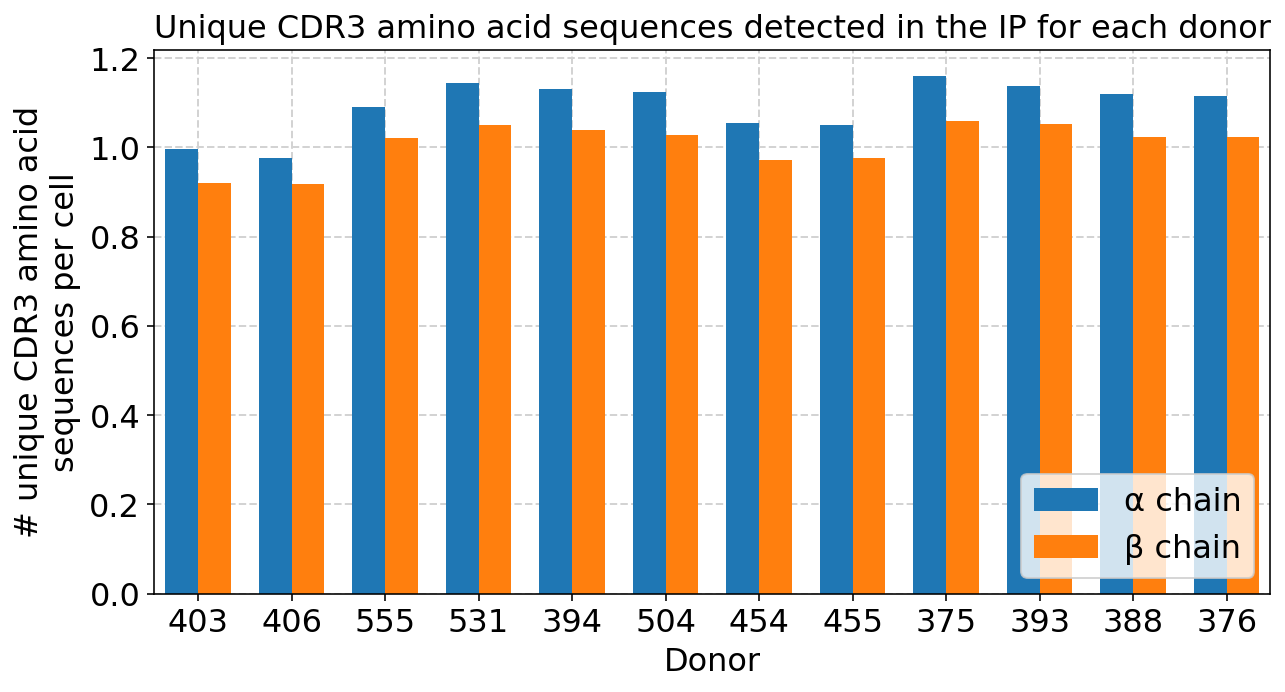

In [29]:
cellnum_threshold = 100

fig, ax = plt.subplots(figsize=(10,5))
fontsize = 16
width = 0.35

df_ip = df_all[df_all["timepoint"]=="IP"]

x = 0
donors = []
for donor in df_ip["donor"].unique():
    # Only take into account donors with at least [cellnum_threshold] cells
    if len(df_ip[df_ip["donor"]==donor]["barcode_+_library_id"].unique()) >= cellnum_threshold and donor != 'doublet' and donor != 'unassigned':
        tra_cdr3 = len(df_ip[(df_ip["chain"] == "TRA") & (df_ip["donor"] == donor)]["cdr3"].unique())
        tra_num_cells = len(df_ip[(df_ip["chain"] == "TRA") & (df_ip["donor"] == donor)]["barcode_+_library_id"].unique())
        
        trb_cdr3 = len(df_ip[(df_ip["chain"] == "TRB") & (df_ip["donor"] == donor)]["cdr3"].unique())
        trb_num_cells = len(df_ip[(df_ip["chain"] == "TRB") & (df_ip["donor"] == donor)]["barcode_+_library_id"].unique())
        
        if x == 0:
            ax.bar(x-width/2, tra_cdr3/tra_num_cells, width=width, label="α chain", color="#1f77b4")
            ax.bar(x+width/2, trb_cdr3/trb_num_cells, width=width, label="β chain", color="#ff7f0e")
        else:
            ax.bar(x-width/2, tra_cdr3/tra_num_cells, width=width, color="#1f77b4")
            ax.bar(x+width/2, trb_cdr3/trb_num_cells, width=width, color="#ff7f0e")
        
        donors.append(donor)
        x += 1

ax.set_xticks(np.arange(len(donors)), donors)

ax.set_title(f"Unique CDR3 amino acid sequences detected in the IP for each donor", y=1.0, fontsize=fontsize)
ax.set_ylabel("# unique CDR3 amino acid\nsequences per cell", fontsize=fontsize)
ax.set_xlabel("Donor", fontsize=fontsize)
ax.tick_params(axis="both", labelsize=fontsize)

ax.legend(fontsize=fontsize, loc="lower right")

ax.margins(x=0.01)

ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
ax.set_axisbelow(True)

fig.savefig(f"figures/clonotype_nums_IP_all_donors.png", dpi=300, bbox_inches="tight")
fig.savefig(f"figures/clonotype_nums_IP_all_donors.svg", dpi=300, bbox_inches="tight")

fig.show()

### Plot number of clonotypes over time

Note number of unique cdr3 and unique clonotype IDs differs!

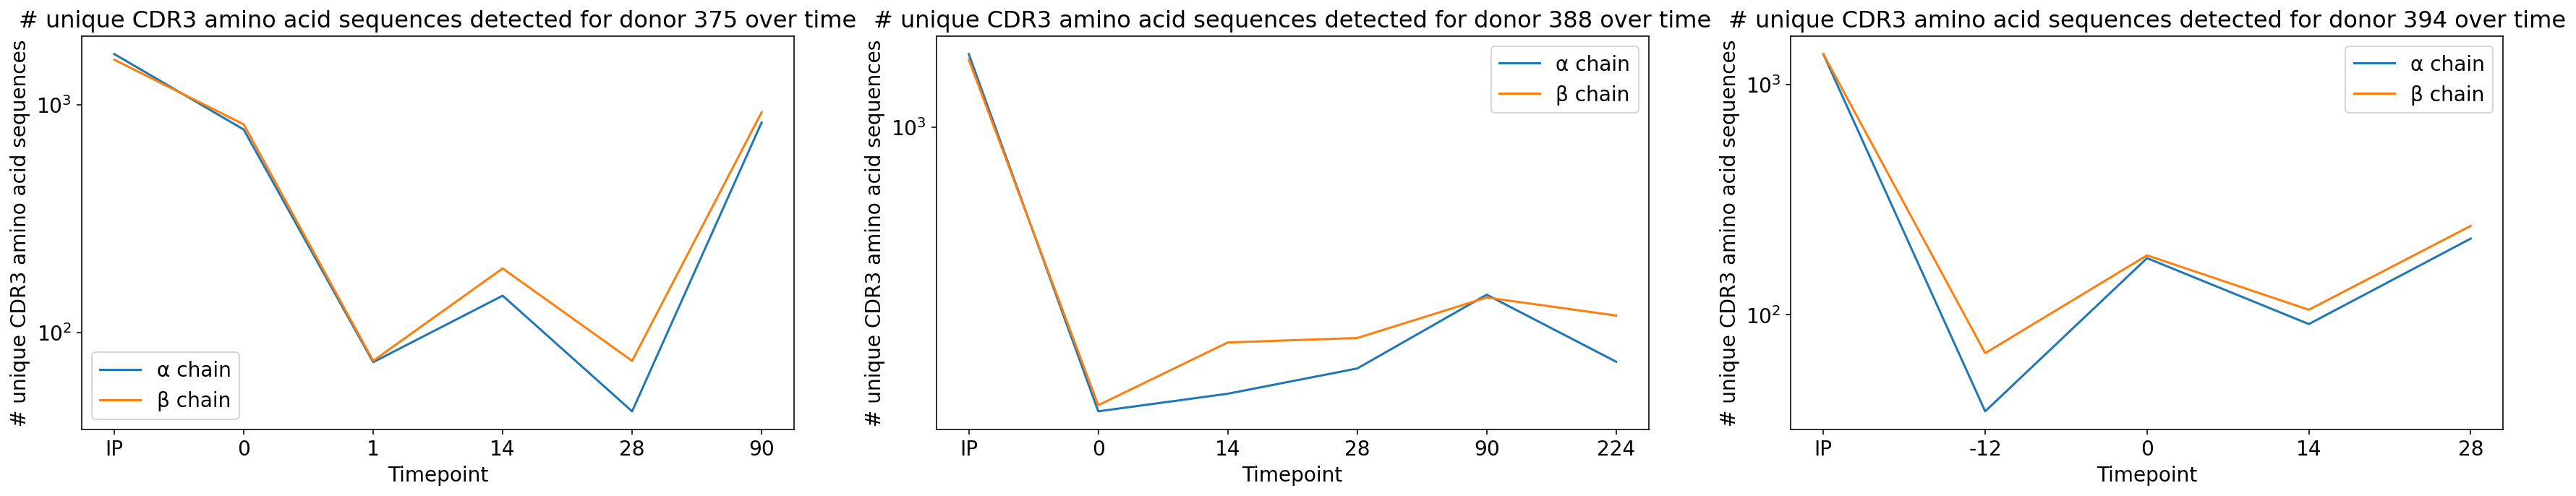

In [30]:
timepoints = ["IP", -12, -6, 0, 1, 14, 25, 28, 90, 224]

cellnum_threshold = 100
donors = ["375", "388", "394"]
        

fig, axs = plt.subplots(figsize=(30,5), ncols=len(donors))
fontsize = 14

for i, donor in enumerate(donors):
    cdr3_counts_A = []
    cdr3_counts_B = []
    tps_thresholded = []
    for tp in timepoints:
        # Only take into account timpeoint with at least [cellnum_threshold] cells
        if len(df_all[(df_all["donor"]==donor) & (df_all["timepoint"]==tp)]["barcode_+_library_id"].unique()) >= cellnum_threshold:
            cdr3_counts_A.append(len(df_all[(df_all["chain"] == "TRA") & (df_all["donor"] == donor) & (df_all["timepoint"] == tp)]["cdr3"].unique()))
            cdr3_counts_B.append(len(df_all[(df_all["chain"] == "TRB") & (df_all["donor"] == donor) & (df_all["timepoint"] == tp)]["cdr3"].unique()))
            tps_thresholded.append(tp)
        
    ax = axs[i]
    ax.plot([str(tp) for tp in tps_thresholded], cdr3_counts_A, label="α chain")
    ax.plot([str(tp) for tp in tps_thresholded], cdr3_counts_B, label="β chain")

    ax.set_title(f"# unique CDR3 amino acid sequences detected for donor {donor} over time", y=1.0, fontsize=fontsize + 2)
    ax.set_ylabel("# unique CDR3 amino acid sequences", fontsize=fontsize)
    ax.set_xlabel("Timepoint", fontsize=fontsize)
    ax.tick_params(axis="both", labelsize=fontsize)

    ax.legend(fontsize=fontsize)

    ax.set_yscale("symlog")

fig.show()

!!! Plots above show total number of unique sequences. Normalize to number of cells:

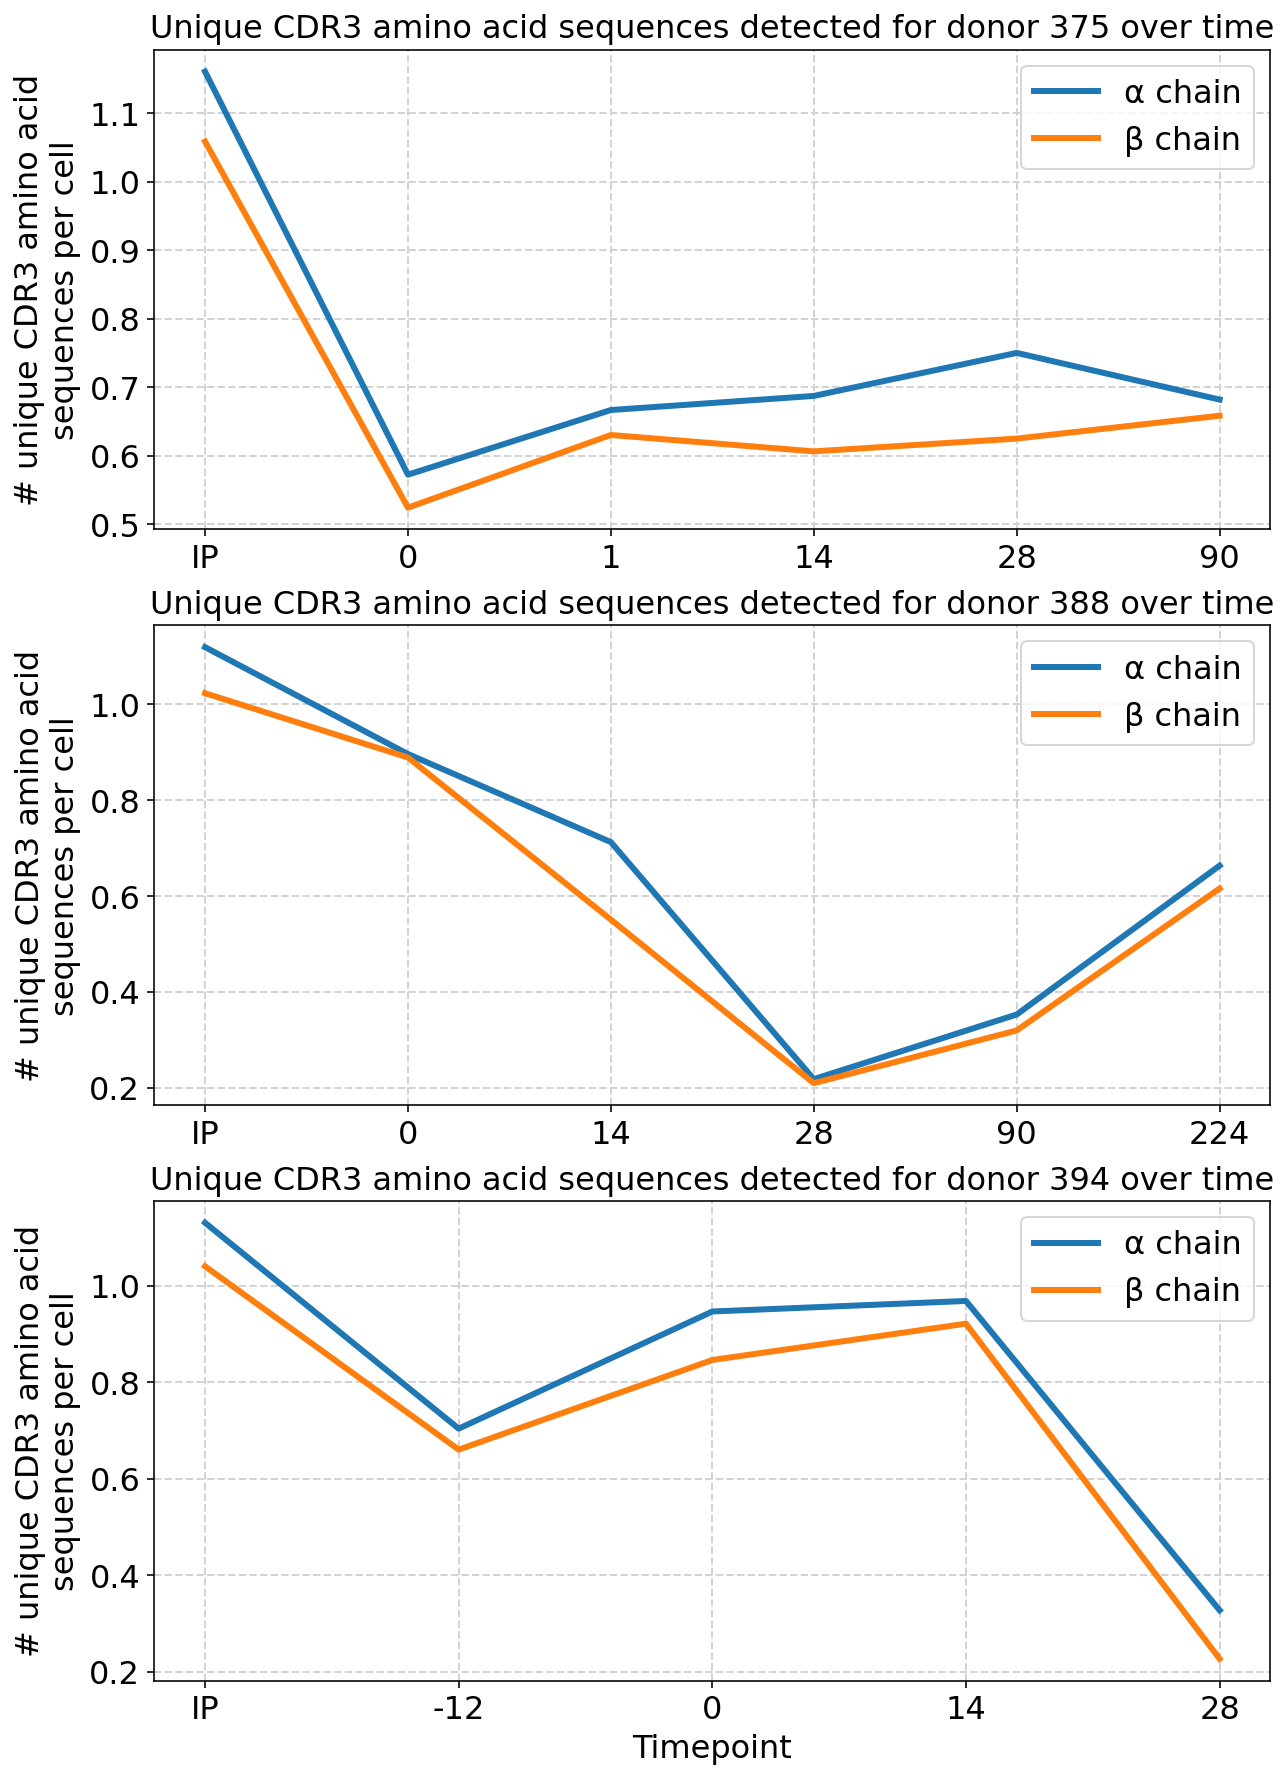

In [31]:
timepoints = ["IP", -12, -6, 0, 1, 14, 25, 28, 90, 224]

cellnum_threshold = 100
donors = ["375", "388", "394"]

fig, axs = plt.subplots(figsize=(10,15), nrows=3)
fontsize = 16

for i, donor in enumerate(donors):
    tra_cdr3_counts = []
    trb_cdr3_counts = []
    tps_thresholded = []
    for tp in timepoints:
        # Only take into account timepoint with at least [cellnum_threshold] cells
        if len(df_all[(df_all["donor"]==donor) & (df_all["timepoint"]==tp)]["barcode_+_library_id"].unique()) >= cellnum_threshold:
            tra_cdr3 = len(df_all[(df_all["chain"] == "TRA") & (df_all["donor"] == donor) & (df_all["timepoint"] == tp)]["cdr3"].unique())
            tra_num_cells = len(df_all[(df_all["chain"] == "TRA") & (df_all["donor"] == donor) & (df_all["timepoint"] == tp)]["barcode_+_library_id"].unique())
            tra_cdr3_counts.append(tra_cdr3 / tra_num_cells)

            trb_cdr3 = len(df_all[(df_all["chain"] == "TRB") & (df_all["donor"] == donor) & (df_all["timepoint"] == tp)]["cdr3"].unique())
            trb_num_cells = len(df_all[(df_all["chain"] == "TRB") & (df_all["donor"] == donor) & (df_all["timepoint"] == tp)]["barcode_+_library_id"].unique())
            trb_cdr3_counts.append(trb_cdr3 / trb_num_cells)

            tps_thresholded.append(tp)
            

    ax = axs[i]
    
    # Generate data frame to save raw data
    df_clon_nums = pd.DataFrame()
    df_clon_nums["timepoint"] = tps_thresholded
    df_clon_nums["#_unique_alpha_cdr3_per_cell"] = tra_cdr3_counts
    df_clon_nums["#_unique_beta_cdr3_per_cell"] = trb_cdr3_counts
    df_clon_nums.to_csv(f"donor{donor}_clonotype_nums_over_time.csv", index=False)
    
    ax.plot([str(tp) for tp in tps_thresholded], tra_cdr3_counts, label="α chain", lw=3)
    ax.plot([str(tp) for tp in tps_thresholded], trb_cdr3_counts, label="β chain", lw=3)

    ax.set_title(f"Unique CDR3 amino acid sequences detected for donor {donor} over time", y=1.0, fontsize=fontsize)
    ax.set_ylabel("# unique CDR3 amino acid\nsequences per cell", fontsize=fontsize)
    ax.tick_params(axis="both", labelsize=fontsize)

    ax.legend(fontsize=fontsize)

    ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
    ax.set_axisbelow(True)

ax.set_xlabel("Timepoint", fontsize=fontsize)

fig.savefig(f"figures/clonotype_nums_over_time.png", dpi=300, bbox_inches="tight")
fig.savefig(f"figures/clonotype_nums_over_time.svg", dpi=300, bbox_inches="tight")

fig.show()

### Shared clonotypes over time

In [32]:
# shared_tp = df_all[df_all["donor"] == "388"].groupby("cdr3")["timepoint"].value_counts().unstack().fillna(0)
# shared_tp

In [33]:
# fig, ax = plt.subplots(figsize = (30, 20))
# fontsize = 14

# im = ax.imshow(shared_tp.T)
# # cbar = ax.figure.colorbar(im, ax=ax)

# # Show all ticks and label them with the respective list entries
# ax.set_yticks(np.arange(len(shared_tp.columns)), labels=shared_tp.columns)
# ax.set_xticks(np.arange(len(shared_tp.index.values)), labels=shared_tp.index.values)

# # Rotate the tick labels and set their alignment
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# ax.set_title("Counts per clonotype for donor 388 over time", fontsize=fontsize+10)
# ax.set_ylabel("Timepoint", fontsize=fontsize+5)
# ax.set_xlabel("CDR3 amino acid sequence", fontsize=fontsize+5)
# ax.tick_params(axis="x", labelsize=fontsize)
# ax.tick_params(axis="y", labelsize=fontsize-2)

# fig.tight_layout()
# fig.show()

In [34]:
def fill_between_bars(ax, timepoints, color, hatch):
    bottoms = []
    tops = []
    for patch in ax.patches[-len(timepoints):]:
        x,y = patch.get_xy()
        w,h = patch.get_width(), patch.get_height()

        bottoms += [(x,y), (x+w, y)]
        tops += [(x, y+h), (x+w, y+h)]

    # convert to numpy for easy slicing
    tops = np.array(tops)
    bottoms = np.array(bottoms)

    # extract the x coordinates
    x = np.unique(bottoms[:,0])
    num_x = len(x)

    # fill between each bottom and top pairs
    for i in range(0, len(bottoms), num_x):
        ax.fill_between(x, tops[i:i+num_x, 1], bottoms[i:i+num_x, 1], alpha=0.5, color=color, lw=0, hatch=hatch)

In [38]:
def plot_clonotype_bar(df, ax, timepoints, color_thres=0.02):
    # # Only keep clonotypes with more than [threshold] counts across all timepoints
    # threshold = 0
    # df = df.loc[df.sum(axis=1) > threshold]
    # print(len(df))

    # Compute fraction occupied per cdr3 for each timepoint
    for column in df.columns:
        df[column] = df[column].values / df[column].sum()

    # Sort values by most occuring clonotype based on sum across all timpeoints
    # df = df.sort_values(timepoints, ascending=True)
    indeces = np.argsort(df.sum(axis=1).values)
    df = df.iloc[indeces]

    # # Define number of clonotypes to plot, e.g. top 100
    # num = 100
    # df = df[-num:]

    # Plot bar plot
    bottom = np.zeros(len(timepoints))
    color_switch = "lightgrey"
    cmap = matplotlib.colormaps["tab20b"]
    count = 0
    color_idx = 0
    hatch = None
    cdr3_seqs = []
    for cdr3_seq in df.index:
        # Only assign color and label to the clonotypes with the greatest fractions (e.g. clonotype occupies at least 0.02=2% of all clonotypes in one timepoint)
        if df.loc[cdr3_seq].max() > color_thres:
            ax.bar(
                np.arange(len(timepoints)),
                df.loc[cdr3_seq].values,
                bottom = bottom,
                color = cmap(color_idx),
                label=cdr3_seq,
                hatch=hatch
            )
            
            fill_between_bars(ax, timepoints, cmap(color_idx), hatch)

            bottom = bottom + df.loc[cdr3_seq].values
            
            color_idx += 1
            if color_idx == 20:
                color_idx = 0
                hatch="/"
            
            count += 1
            
            # To export into data frame
            cdr3_seqs.append(cdr3_seq)

        else:
            ax.bar(
                np.arange(len(timepoints)),
                df.loc[cdr3_seq].values,
                bottom = bottom,
                color=color_switch
            )

            bottom = bottom + df.loc[cdr3_seq].values

            color_switch = "lightgrey" if color_switch=="grey" else "grey"

    ax.set_xticks(np.arange(len(timepoints)), timepoints)
    # ax.set_yscale("symlog")
    ax.tick_params(axis="both", labelsize=fontsize)
    
    ax.set_xlabel("Timepoint", fontsize=fontsize)
    
    ax.margins(y=0, x=0.01)
    
    # Print number of colors needed
    print(count)

    return ax, cdr3_seqs

Number of TRA clonotypes (incl those with 0 counts for these timepoints):  2527
20
Number of TRB clonotypes (incl those with 0 counts for these timepoints): 2661
21


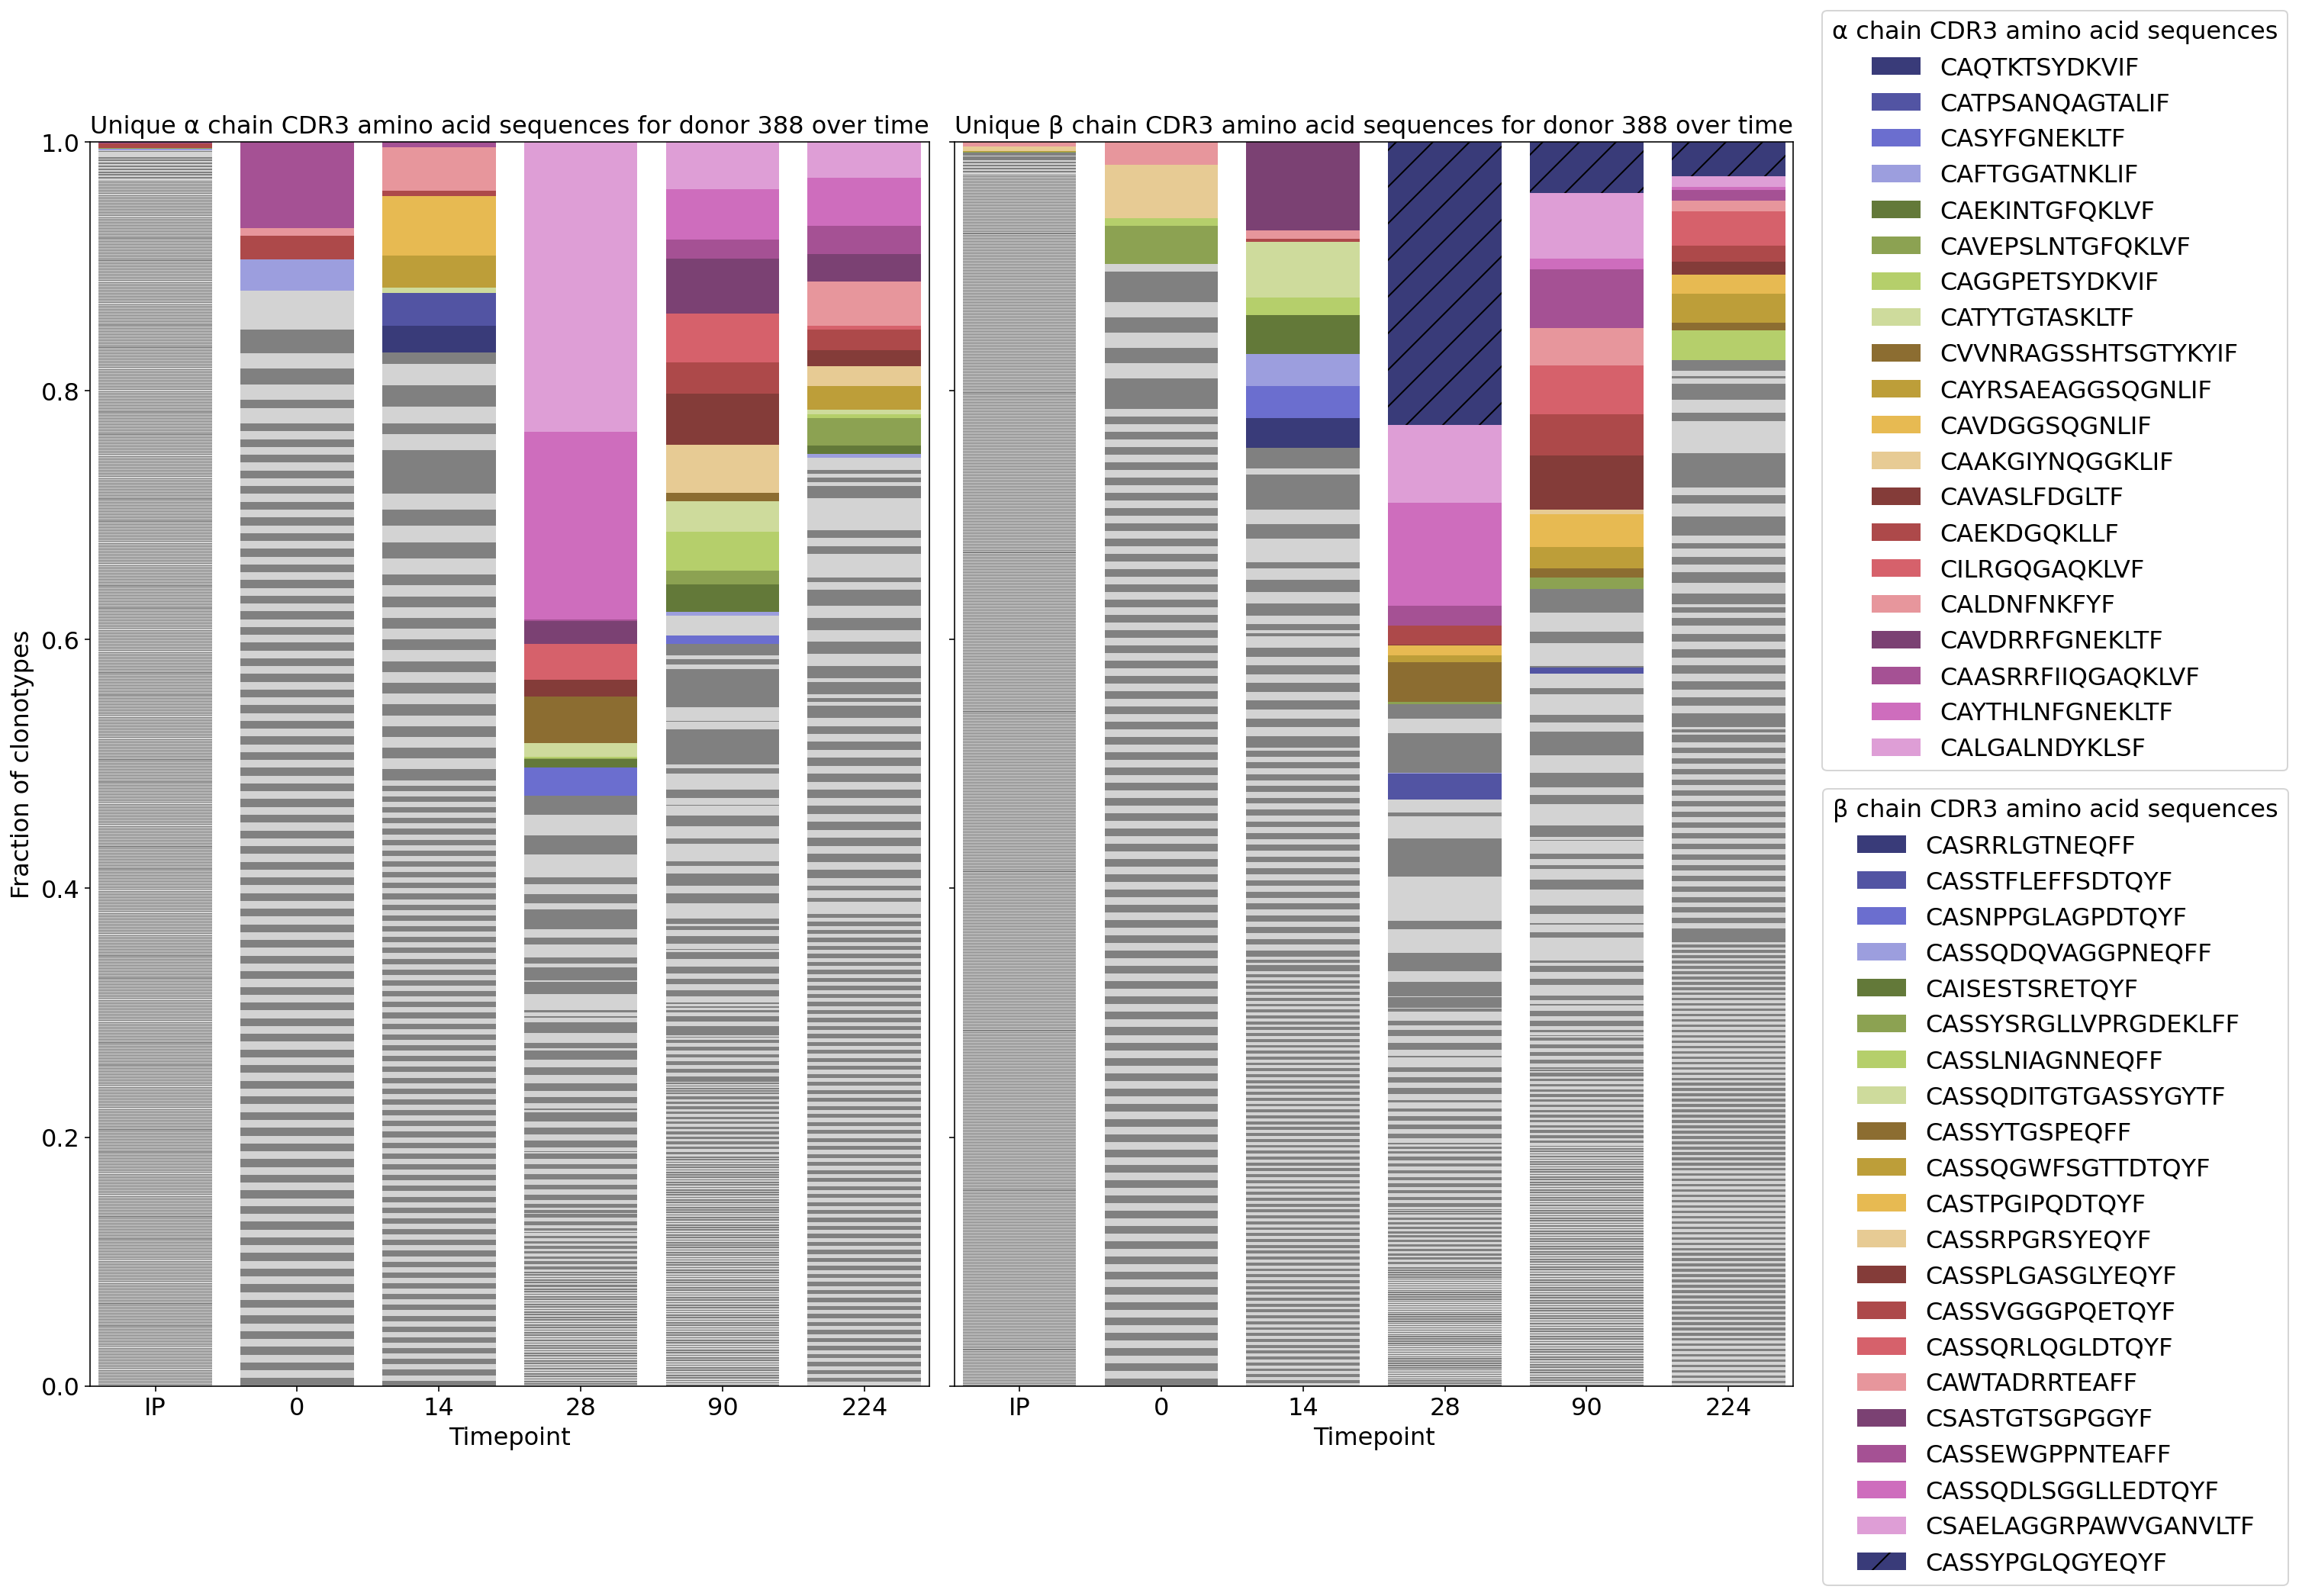

In [85]:
fig, axs = plt.subplots(figsize=(20, 15), ncols=2, sharey=True)
fontsize = 16

timepoints = ["IP", 0, 14, 28, 90, 224]

# Plot TRA clonotypes over time
ax = axs[0]

# Get count for each CDR3 sequence per timepoint
df = df_all[(df_all["donor"] == "388") & (df_all["chain"] == "TRA")].groupby("cdr3")["timepoint"].value_counts().unstack().fillna(0)[timepoints]
print("Number of TRA clonotypes (incl those with 0 counts for these timepoints): ", len(df))

ax = plot_clonotype_bar(df, ax, timepoints)

ax.set_title(f"Unique α chain CDR3 amino acid sequences for donor 388 over time", y=1.0, fontsize=fontsize)
ax.set_ylabel("Fraction of clonotypes", fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='center left', bbox_to_anchor=(2.05, 0.8), title="α chain CDR3 amino acid sequences", title_fontsize = fontsize)

# Plot TRB clonotypes over time
ax = axs[1]

# Get count for each CDR3 sequence per timepoint
df = df_all[(df_all["donor"] == "388") & (df_all["chain"] == "TRB")].groupby("cdr3")["timepoint"].value_counts().unstack().fillna(0)[timepoints]
print("Number of TRB clonotypes (incl those with 0 counts for these timepoints):", len(df))

ax, cdr3_seqs_tmp = plot_clonotype_bar(df, ax, timepoints)

ax.set_title(f"Unique β chain CDR3 amino acid sequences for donor 388 over time", y=1.0, fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='center left', bbox_to_anchor=(1.021, 0.16), title="β chain CDR3 amino acid sequences", title_fontsize = fontsize)

plt.subplots_adjust(wspace=0.03)

# fig.savefig(f"figures/clonotypes_over_time.png", dpi=300, bbox_inches="tight")
# fig.savefig(f"figures/clonotypes_over_time.svg", dpi=300, bbox_inches="tight")

fig.show()

# Define clonotypes by same alpha and beta chain (both together) 

In [36]:
%%time

barcodes=[]
donors=[]
timepoints=[]
alphas=[]
betas=[]
for barcode in df_all["barcode_+_library_id"].unique():
    barcodes.append(barcode)
    donors.append(df_all[df_all["barcode_+_library_id"]==barcode]["donor"].values[0])
    timepoints.append(df_all[df_all["barcode_+_library_id"]==barcode]["timepoint"].values[0])
    try:
        alphas.append(df_all[(df_all["barcode_+_library_id"]==barcode) & (df_all["chain"]=="TRA")]["cdr3"].values[0])
    except IndexError:
        alphas.append(np.NaN)
    try:
        betas.append(df_all[(df_all["barcode_+_library_id"]==barcode) & (df_all["chain"]=="TRB")]["cdr3"].values[0])
    except IndexError:
        betas.append(np.NaN)
    
df_clono = pd.DataFrame()
df_clono["barcode"] = barcodes
df_clono["donor"] = donors
df_clono["timepoint"] = timepoints
df_clono["alphas"] = alphas
df_clono["betas"] = betas
df_clono

CPU times: user 11min 50s, sys: 237 ms, total: 11min 50s
Wall time: 11min 50s


barcode       donor timepoint           alphas  \
0      AAACCTGAGCGCTTATSE6453_SA71976     doublet        IP     CAVDPNDYKLSF   
1      AAACCTGAGGAGCGAGSE6453_SA71976     doublet        IP   CALVERQAGTALIF   
2      AAACCTGAGTAGATGTSE6453_SA71976     doublet        IP  CAMREARSNDYKLSF   
3      AAACCTGAGTGGAGAASE6453_SA71976  unassigned        IP   CAENGDNYGQNFVF   
4      AAACCTGCAAAGGTGCSE6453_SA71976     doublet        IP              NaN   
...                               ...         ...       ...              ...   
33982  TTTGTCATCCGGCACASE6081_SA58161         393        IP  CAASDRGGATNKLIF   
33983  TTTGTCATCGACGGAASE6081_SA58161         375        IP     CAFASDGQKLLF   
33984  TTTGTCATCGCCATAASE6081_SA58161         388        IP   CAAFPTDSWGKLQF   
33985  TTTGTCATCGTATCAGSE6081_SA58161         388        IP     CAGPSNDYKLSF   
33986  TTTGTCATCTTGTATCSE6081_SA58161         388        IP              NaN   

                  betas  
0        CASSRAGATETQYF  
1       CASSPPTDRGEKLFF  
2        CSVVEGQGITEAFF  
3      CASSLTLAGLYNEQFF  
4          CASSQEAGTQYF  
...                 ...  
33982     CASSLLRGNEQFF  
33983    CASSADRGNEKLFF  
33984     CASRAPSYNEQFF  
33985   CASSPGLAGGNEQFF  
33986   CASSLEDRSSYEQYF  

[33987 rows x 5 columns]

In [37]:
df_clono_clean = df_clono.dropna()

df_clono_clean["clonotype"] = df_clono_clean["alphas"] + "_" + df_clono_clean["betas"]
df_clono_clean

/tmp/ipykernel_190009/1523640739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clono_clean["clonotype"] = df_clono_clean["alphas"] + "_" + df_clono_clean["betas"]


barcode       donor timepoint           alphas  \
0      AAACCTGAGCGCTTATSE6453_SA71976     doublet        IP     CAVDPNDYKLSF   
1      AAACCTGAGGAGCGAGSE6453_SA71976     doublet        IP   CALVERQAGTALIF   
2      AAACCTGAGTAGATGTSE6453_SA71976     doublet        IP  CAMREARSNDYKLSF   
3      AAACCTGAGTGGAGAASE6453_SA71976  unassigned        IP   CAENGDNYGQNFVF   
5      AAACCTGGTGAACCTTSE6453_SA71976     doublet        IP   CAVAAFSDGQKLLF   
...                               ...         ...       ...              ...   
33981  TTTGTCATCAGAGCTTSE6081_SA58161         393        IP   CAASVEGGSEKLVF   
33982  TTTGTCATCCGGCACASE6081_SA58161         393        IP  CAASDRGGATNKLIF   
33983  TTTGTCATCGACGGAASE6081_SA58161         375        IP     CAFASDGQKLLF   
33984  TTTGTCATCGCCATAASE6081_SA58161         388        IP   CAAFPTDSWGKLQF   
33985  TTTGTCATCGTATCAGSE6081_SA58161         388        IP     CAGPSNDYKLSF   

                  betas                        clonotype  
0        CASSRAGATETQYF      CAVDPNDYKLSF_CASSRAGATETQYF  
1       CASSPPTDRGEKLFF   CALVERQAGTALIF_CASSPPTDRGEKLFF  
2        CSVVEGQGITEAFF   CAMREARSNDYKLSF_CSVVEGQGITEAFF  
3      CASSLTLAGLYNEQFF  CAENGDNYGQNFVF_CASSLTLAGLYNEQFF  
5        CSASPLGGFSEQFF    CAVAAFSDGQKLLF_CSASPLGGFSEQFF  
...                 ...                              ...  
33981   CSARGLAGSNYEQYF   CAASVEGGSEKLVF_CSARGLAGSNYEQYF  
33982     CASSLLRGNEQFF    CAASDRGGATNKLIF_CASSLLRGNEQFF  
33983    CASSADRGNEKLFF      CAFASDGQKLLF_CASSADRGNEKLFF  
33984     CASRAPSYNEQFF     CAAFPTDSWGKLQF_CASRAPSYNEQFF  
33985   CASSPGLAGGNEQFF     CAGPSNDYKLSF_CASSPGLAGGNEQFF  

[26523 rows x 6 columns]

Number of TRA+TRB clonotypes (incl those with 0 counts for these timepoints):  2457
35


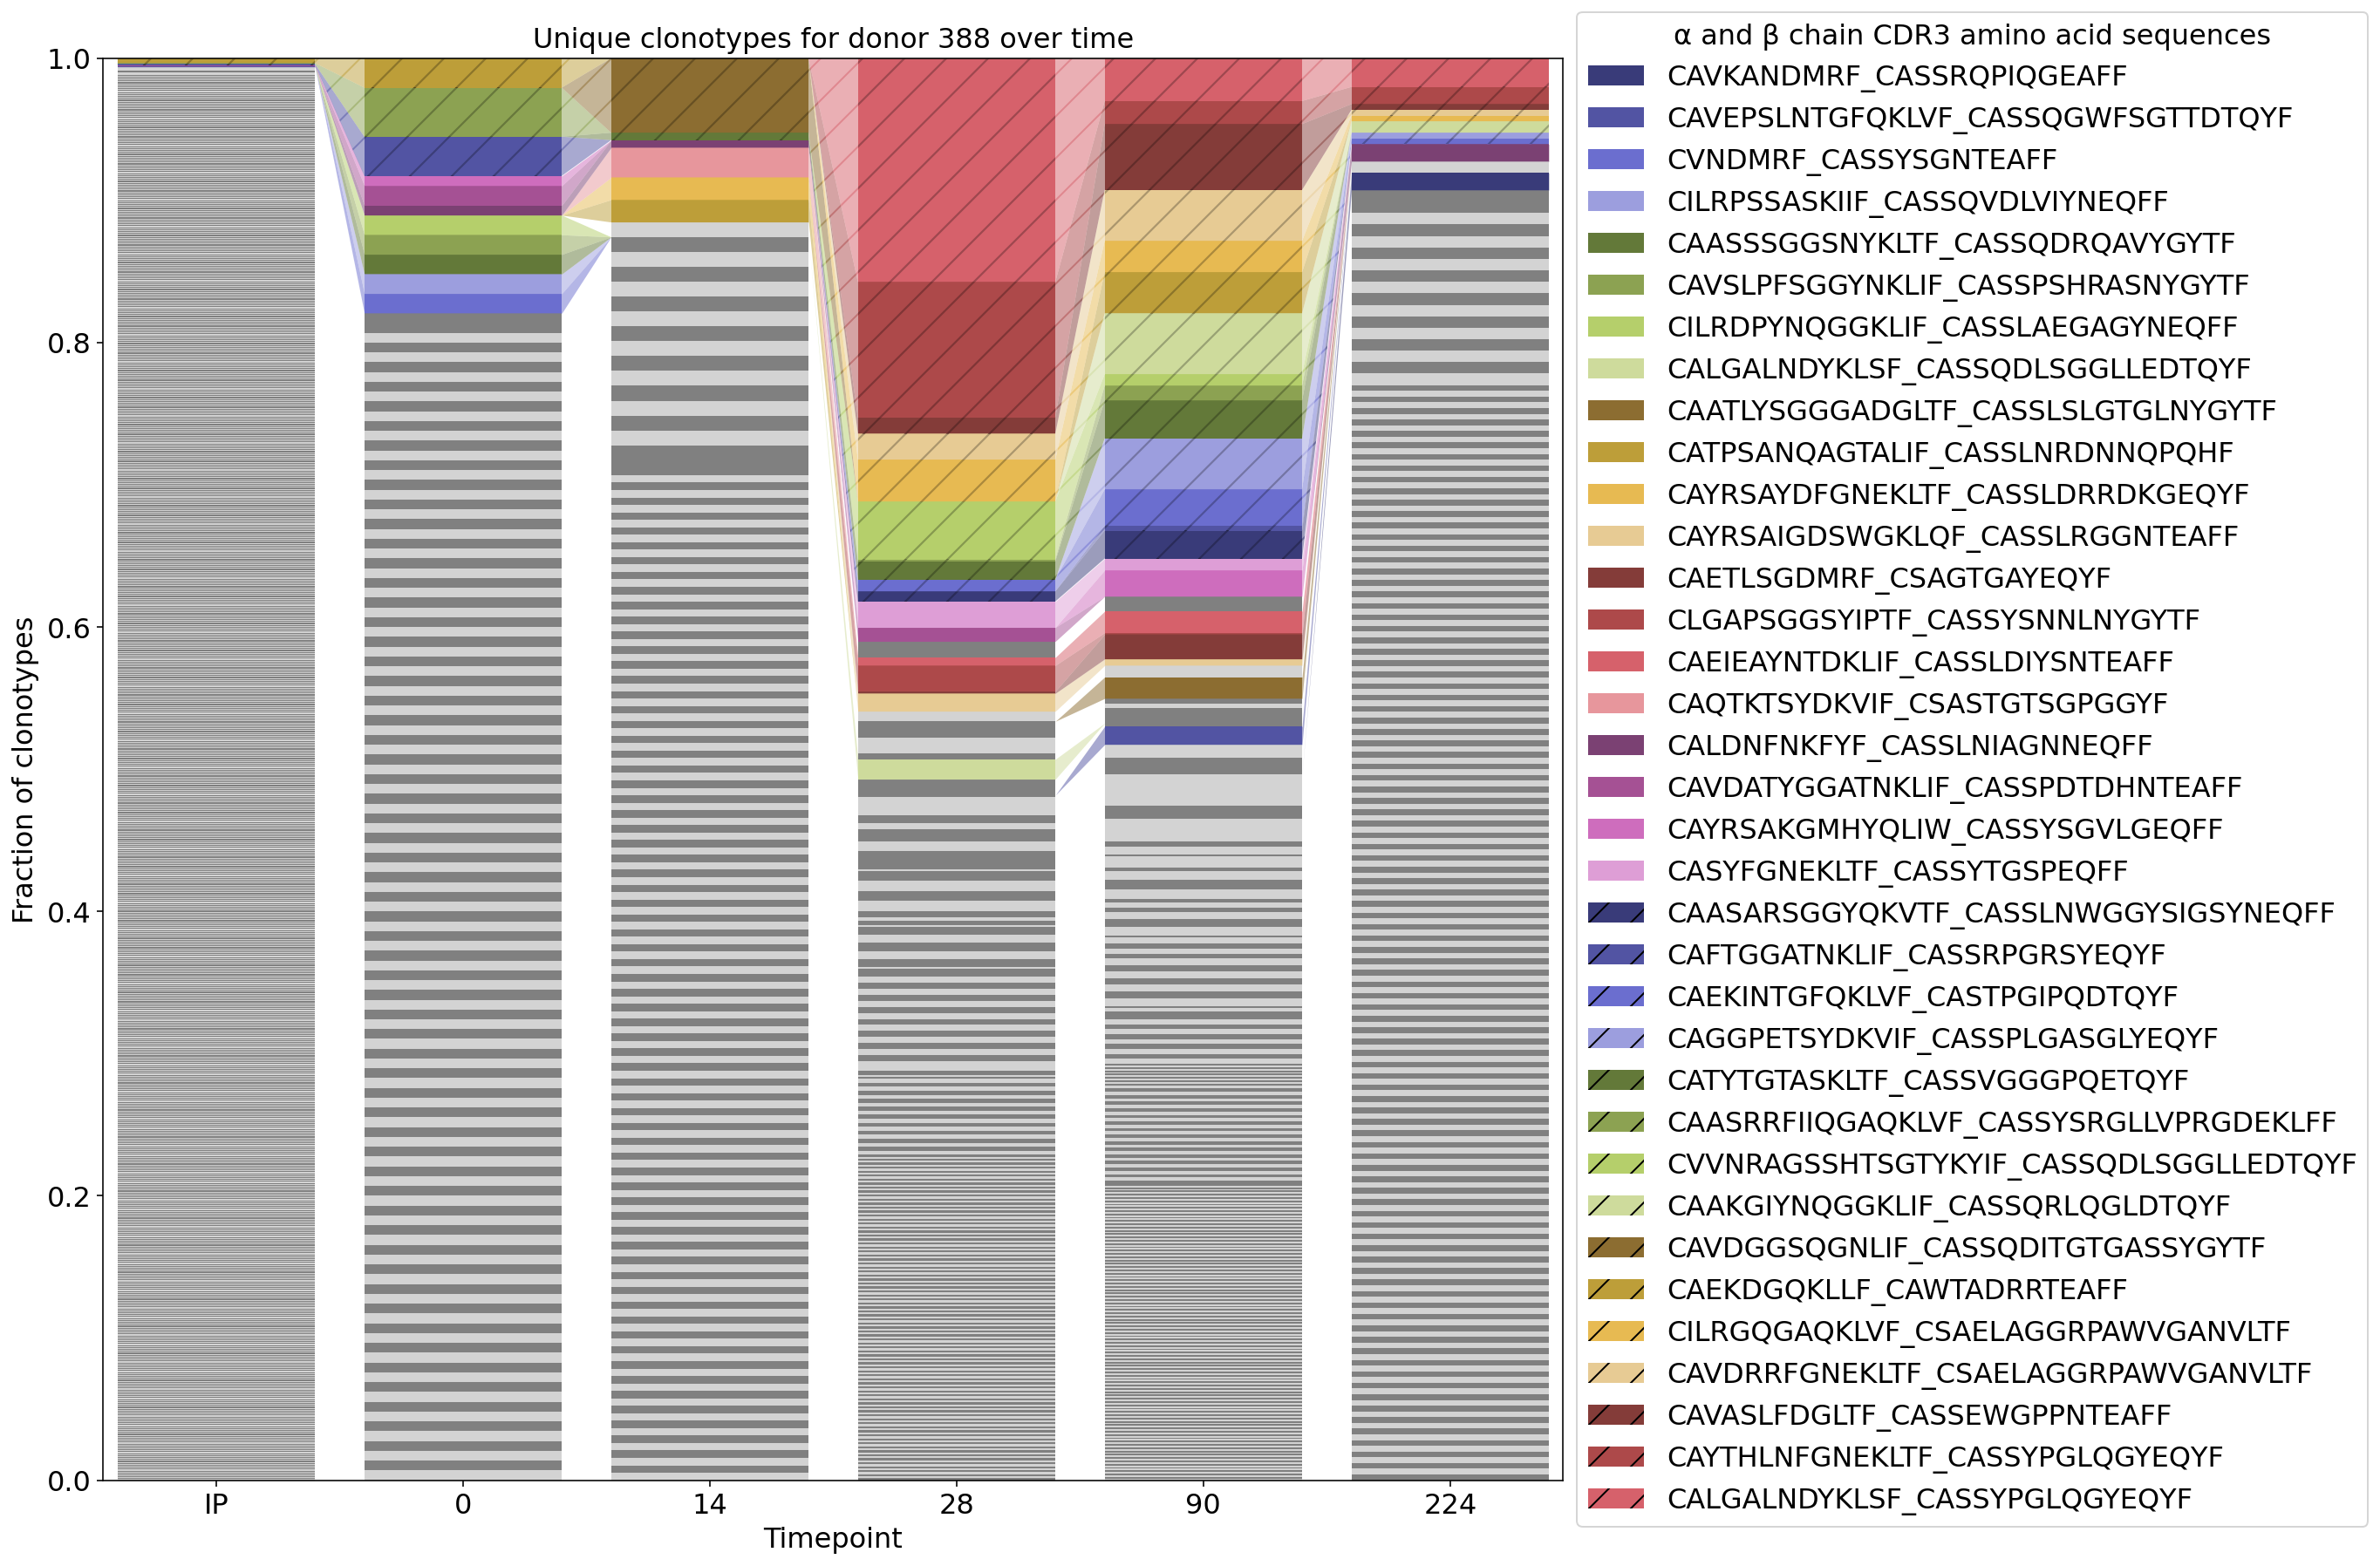

In [39]:
fig, ax = plt.subplots(figsize=(15, 15))
fontsize = 16

timepoints = ["IP", 0, 14, 28, 90, 224]

# Plot clonotypes over time
# Get count for each CDR3 sequence per timepoint
df_2 = df_clono_clean[df_clono_clean["donor"] == "388"].groupby("clonotype")["timepoint"].value_counts().unstack().fillna(0)[timepoints]
print("Number of TRA+TRB clonotypes (incl those with 0 counts for these timepoints): ", len(df_2))

ax, cdr3_seqs = plot_clonotype_bar(df_2, ax, timepoints, color_thres=0.012) # Coloring the top 35 clonotypes (clonotype occupies at least 0.012=1.2% of all clonotypes in one timepoint)

ax.set_title(f"Unique clonotypes for donor 388 over time", y=1.0, fontsize=fontsize)
ax.set_ylabel("Fraction of clonotypes", fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='center left', bbox_to_anchor=(1, 0.5), title="α and β chain CDR3 amino acid sequences", title_fontsize = fontsize)

fig.savefig(f"figures/clonotypes_over_time.png", dpi=300, bbox_inches="tight")
fig.savefig(f"figures/clonotypes_over_time.svg", dpi=300, bbox_inches="tight")

fig.show()

Save CDR3 sequences in separate data frame:

In [44]:
df_seqs = pd.DataFrame()

df_seqs["seq"] = cdr3_seqs
df_seqs["alpha"] = [i.split("_")[0] for i in df_seqs["seq"].values]
df_seqs["beta"] = [i.split("_")[1] for i in df_seqs["seq"].values]
df_seqs = df_seqs.drop("seq", axis=1)

df_seqs.to_csv("donor388_unique_CDR3_seqs.csv", index=False)

df_seqs

alpha                  beta
0            CAVKANDMRF        CASSRQPIQGEAFF
1      CAVEPSLNTGFQKLVF     CASSQGWFSGTTDTQYF
2               CVNDMRF         CASSYSGNTEAFF
3         CILRPSSASKIIF      CASSQVDLVIYNEQFF
4       CAASSSGGSNYKLTF       CASSQDRQAVYGYTF
5      CAVSLPFSGGYNKLIF      CASSPSHRASNYGYTF
6       CILRDPYNQGGKLIF      CASSLAEGAGYNEQFF
7         CALGALNDYKLSF    CASSQDLSGGLLEDTQYF
8      CAATLYSGGGADGLTF     CASSLSLGTGLNYGYTF
9       CATPSANQAGTALIF       CASSLNRDNNQPQHF
10     CAYRSAYDFGNEKLTF       CASSLDRRDKGEQYF
11     CAYRSAIGDSWGKLQF        CASSLRGGNTEAFF
12          CAETLSGDMRF          CSAGTGAYEQYF
13       CLGAPSGGSYIPTF       CASSYSNNLNYGYTF
14       CAEIEAYNTDKLIF       CASSLDIYSNTEAFF
15        CAQTKTSYDKVIF        CSASTGTSGPGGYF
16          CALDNFNKFYF       CASSLNIAGNNEQFF
17     CAVDATYGGATNKLIF       CASSPDTDHNTEAFF
18      CAYRSAKGMHYQLIW        CASSYSGVLGEQFF
19         CASYFGNEKLTF         CASSYTGSPEQFF
20      CAASARSGGYQKVTF  CASSLNWGGYSIGSYNEQFF
21        CAFTGGATNKLIF        CASSRPGRSYEQYF
22       CAEKINTGFQKLVF        CASTPGIPQDTQYF
23       CAGGPETSYDKVIF      CASSPLGASGLYEQYF
24        CATYTGTASKLTF       CASSVGGGPQETQYF
25    CAASRRFIIQGAQKLVF  CASSYSRGLLVPRGDEKLFF
26  CVVNRAGSSHTSGTYKYIF    CASSQDLSGGLLEDTQYF
27      CAAKGIYNQGGKLIF       CASSQRLQGLDTQYF
28        CAVDGGSQGNLIF   CASSQDITGTGASSYGYTF
29          CAEKDGQKLLF         CAWTADRRTEAFF
30        CILRGQGAQKLVF  CSAELAGGRPAWVGANVLTF
31       CAVDRRFGNEKLTF  CSAELAGGRPAWVGANVLTF
32         CAVASLFDGLTF       CASSEWGPPNTEAFF
33      CAYTHLNFGNEKLTF       CASSYPGLQGYEQYF
34        CALGALNDYKLSF       CASSYPGLQGYEQYF

### Plot frequency of CDR3 lengths over time

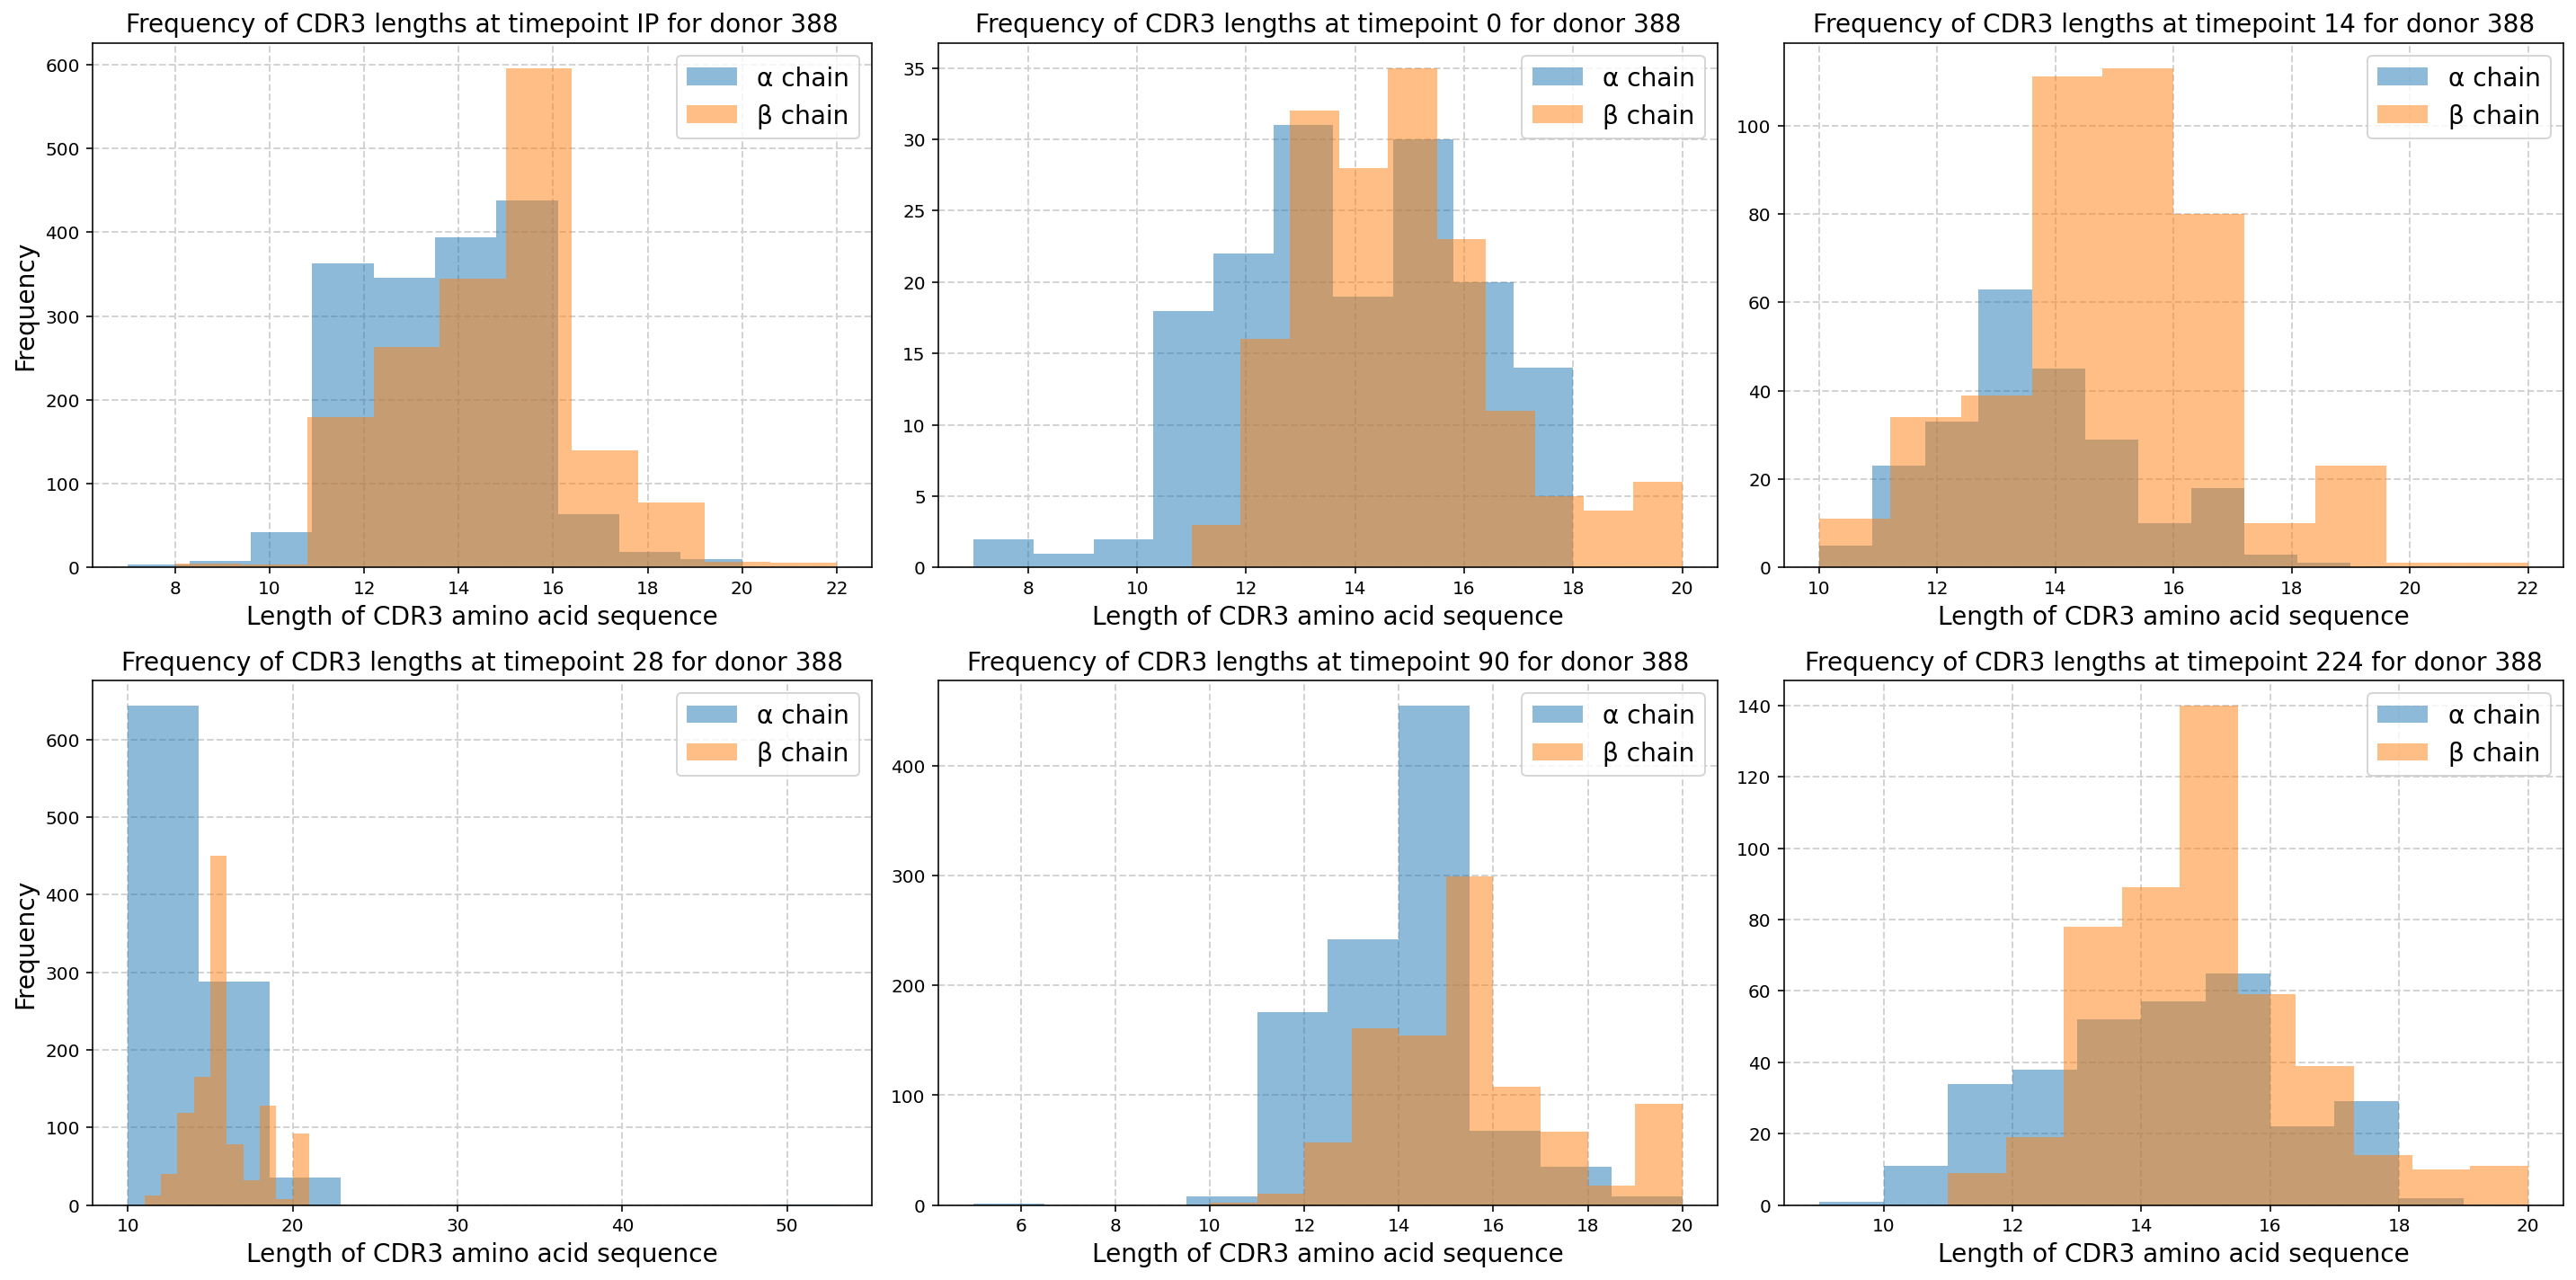

In [148]:
fig, axs = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)
fontsize = 14

timepoints = ["IP", 0, 14, 28, 90, 224]

n_bins = 10

row_idx = 0
col_idx = 0
for tp in timepoints:
    ax = axs[row_idx, col_idx]
    
    df = df_all[(df_all["donor"]=="388") & (df_all["chain"]=="TRA") & (df_all["timepoint"]==tp)]
    lengths = [len(i) for i in df["cdr3"].values]
    ax.hist(lengths, bins=n_bins, label="α chain", color="#1f77b4", alpha=0.5)

    df = df_all[(df_all["donor"]=="388") & (df_all["chain"]=="TRB") & (df_all["timepoint"]==tp)]
    lengths = [len(i) for i in df["cdr3"].values]
    ax.hist(lengths, bins=n_bins, label="β chain", color="#ff7f0e", alpha=0.5)

    ax.legend(fontsize=fontsize)

    ax.grid(True, which="both", color="lightgray", ls="--", lw=1)
    ax.set_axisbelow(True)
    
    ax.set_title(f"Frequency of CDR3 lengths at timepoint {tp} for donor 388", fontsize=fontsize)
    if col_idx==0:
        ax.set_ylabel("Frequency", fontsize=fontsize)

    ax.set_xlabel("Length of CDR3 amino acid sequence", fontsize=fontsize)
    
    col_idx += 1
    if col_idx == 3:
        col_idx = 0
        row_idx += 1

plt.tight_layout()

fig.savefig(f"figures/cdr3_lens.png", dpi=300, bbox_inches="tight")
fig.savefig(f"figures/cdr3_lens.svg", dpi=300, bbox_inches="tight")

fig.show()

### Plot VDJ elements over time

In [149]:
import plotly.graph_objects as go

In [150]:
def get_sankey_arrays(df_388, receptor="TRB"):
    labels = []
    for v_gene in df_388["v_gene"].unique():
        labels.append(str(v_gene).split(receptor)[-1])
    for d_gene in df_388["d_gene"].unique():
        labels.append(str(d_gene).split(receptor)[-1])

    sources = []
    targets = []
    values = []
    for v_gene in df_388["v_gene"].unique():
        for d_gene in df_388["d_gene"].unique():
            value = len(df_388[(df_388["v_gene"]==v_gene) & (df_388["d_gene"]==d_gene)])
            if value > 0:
                values.append(value)
                targets.append(labels.index(d_gene.split(receptor)[-1]))
                sources.append(labels.index(v_gene.split(receptor)[-1]))

    for j_gene in df_388["j_gene"].unique():
        labels.append(str(j_gene).split(receptor)[-1])

    for d_gene in df_388["d_gene"].unique():
        for j_gene in df_388["j_gene"].unique():
            value = len(df_388[(df_388["d_gene"]==d_gene) & (df_388["j_gene"]==j_gene)])
            if value > 0:
                values.append(value)
                targets.append(labels.index(j_gene.split(receptor)[-1]))
                sources.append(labels.index(d_gene.split(receptor)[-1]))

    for c_gene in df_388["c_gene"].unique():
        labels.append(str(c_gene).split(receptor)[-1])

    for j_gene in df_388["j_gene"].unique():
        for c_gene in df_388["c_gene"].unique():
            value = len(df_388[(df_388["j_gene"]==j_gene) & (df_388["c_gene"]==c_gene)])
            if value > 0:
                values.append(value)
                targets.append(labels.index(c_gene.split(receptor)[-1]))
                sources.append(labels.index(j_gene.split(receptor)[-1]))
    
    return labels, values, targets, sources

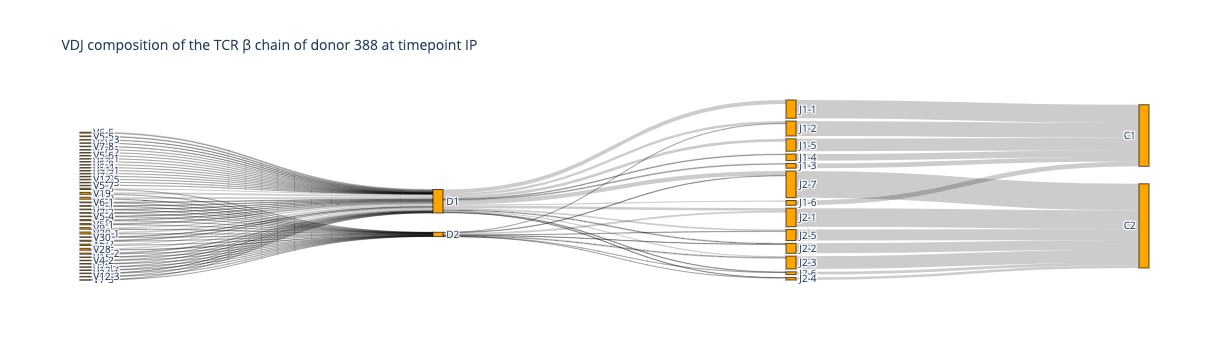

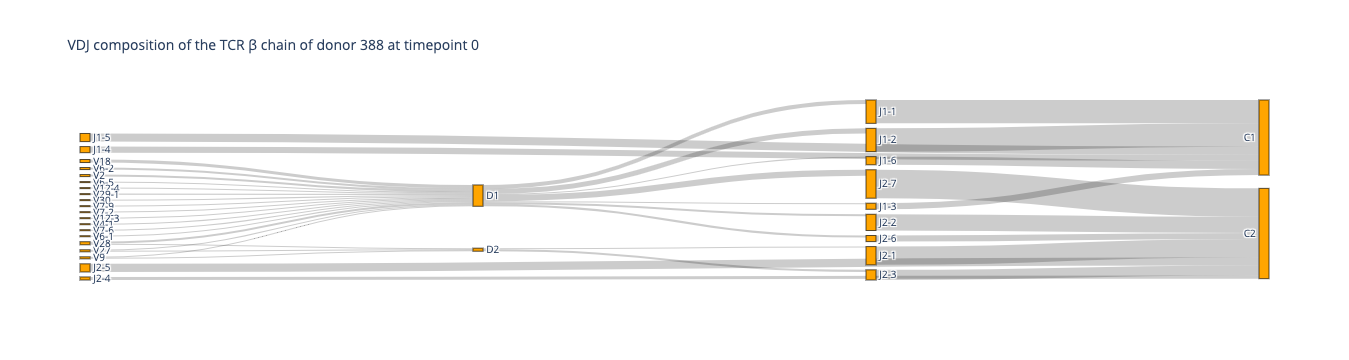

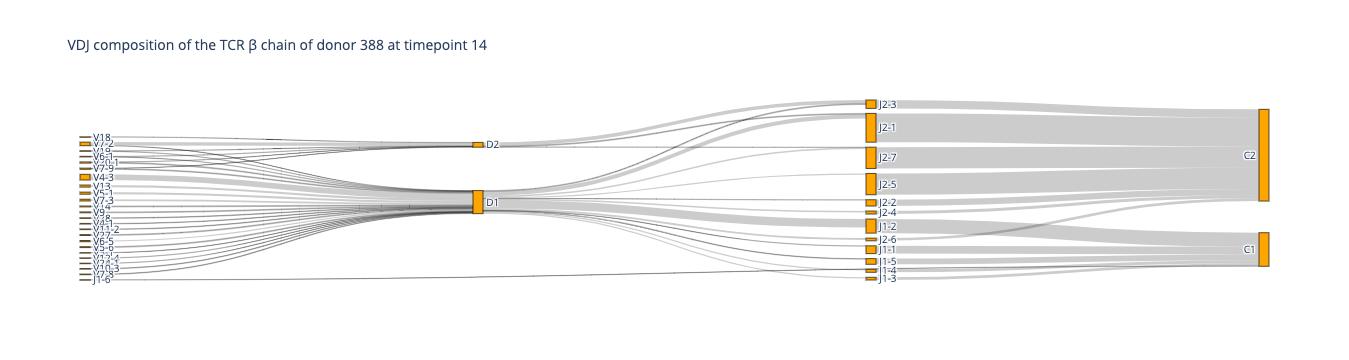

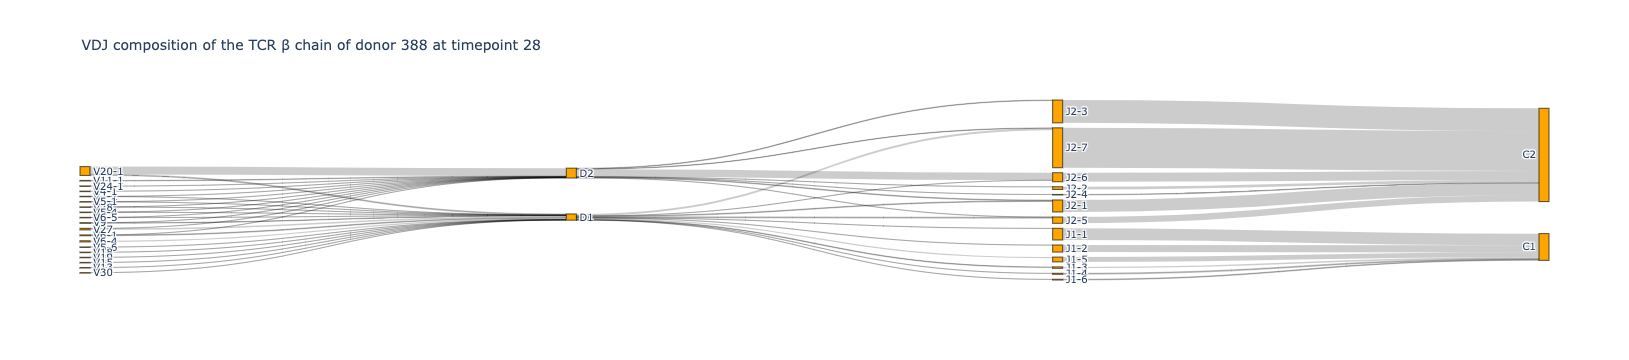

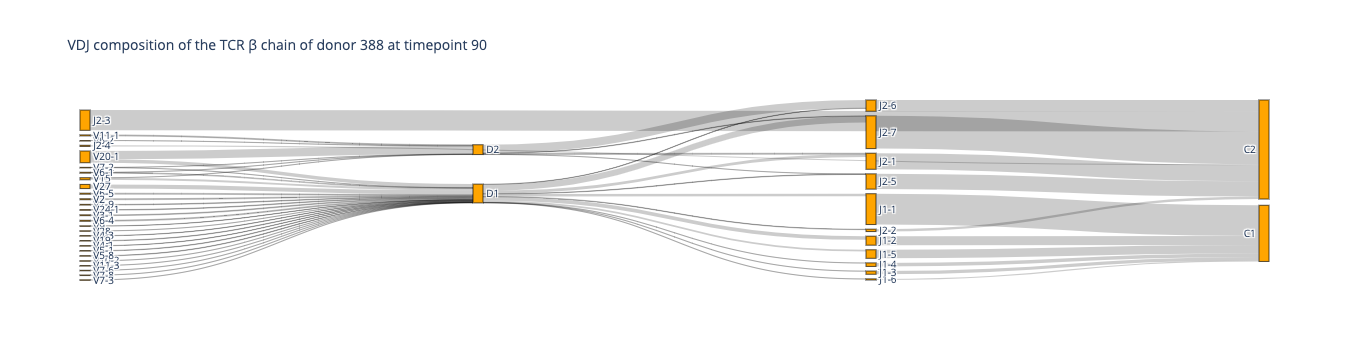

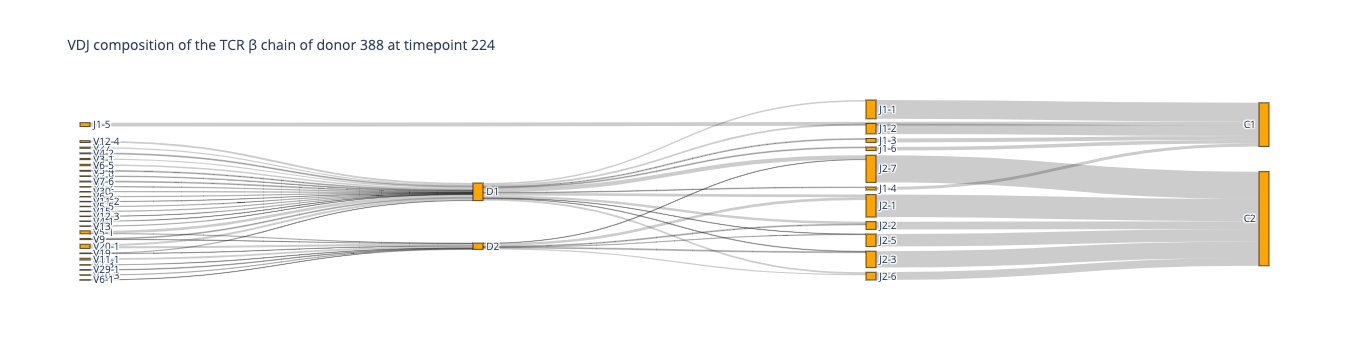

In [151]:
timepoints = ["IP", 0, 14, 28, 90, 224]

for tp in timepoints:
    df = df_all[(df_all["donor"]=="388") & (df_all["chain"]=="TRB") & (df_all["timepoint"]==tp)]
    labels, values, targets, sources = get_sankey_arrays(df)

    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 5,
          thickness = 10,
          line = dict(color = "black", width = 0.5),
          label = labels,
          color = "orange"
        ),
        link = dict(
          source = sources,
          target = targets,
          value = values
      ))])

    # x_labels = ["V gene", "D gene", "J gene", "C gene"]
    # for i, x_label in enumerate(x_labels):
    #     fig.add_annotation(
    #           x=i,
    #           y=-0.1,
    #           text=x_label,
    #           showarrow=False,
    #           align="center",
    #         font_size=14
    #           )

    fig.update_layout(
        title_text=f"VDJ composition of the TCR β chain of donor 388 at timepoint {tp}", 
        font_size=10,
        )

    fig.write_html(f"figures/TRB_VDJ_sankey_diagram_{tp}.html")

    fig.show()

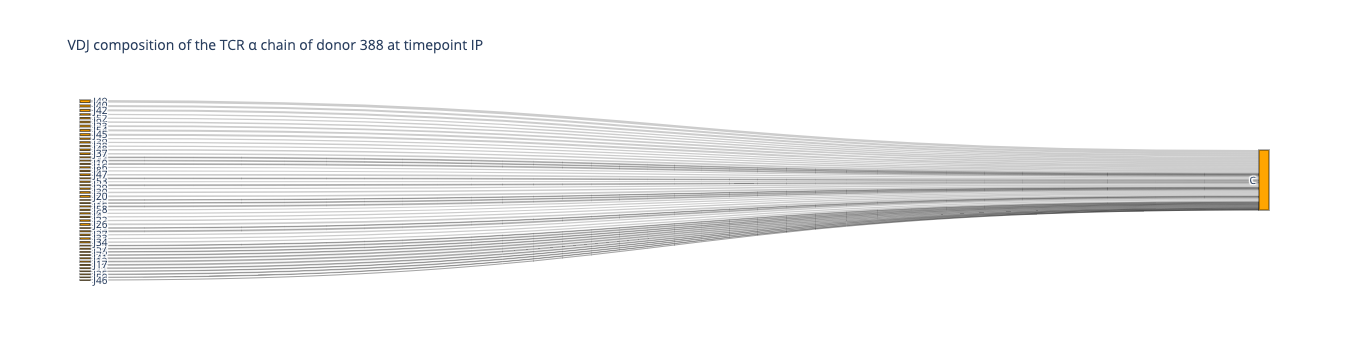

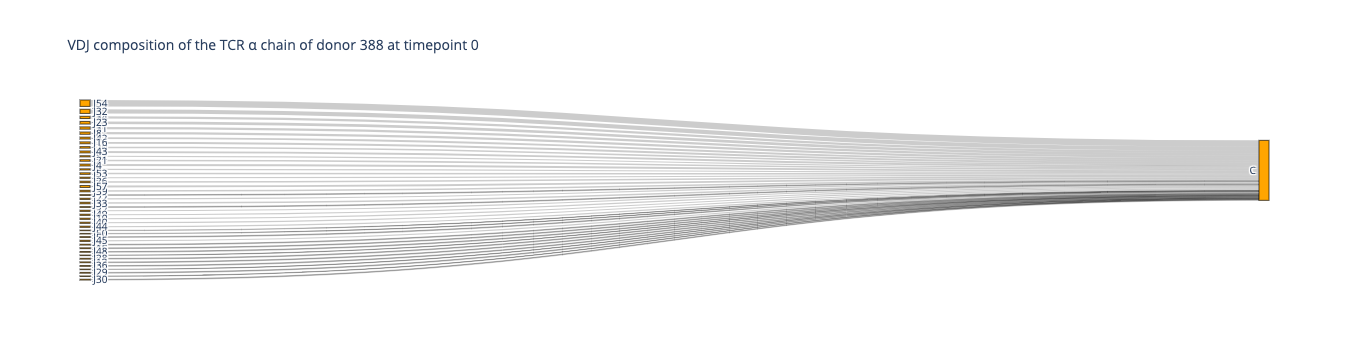

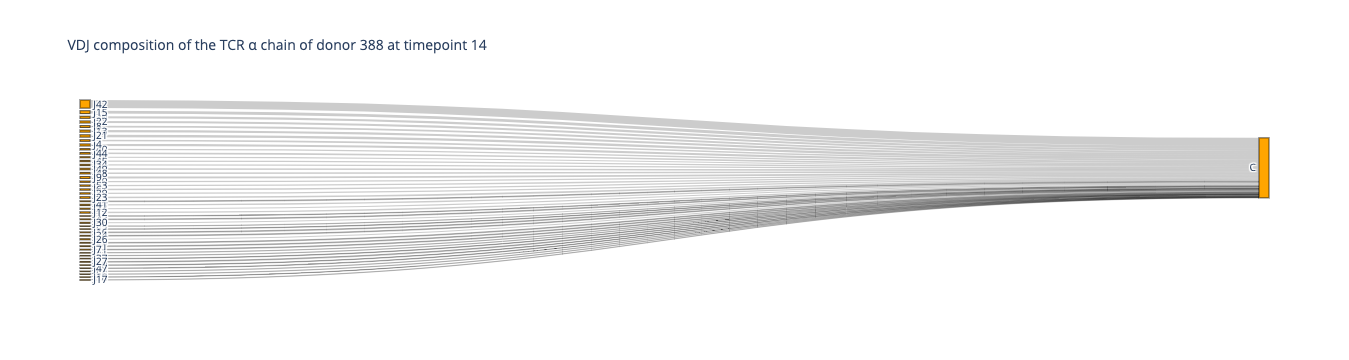

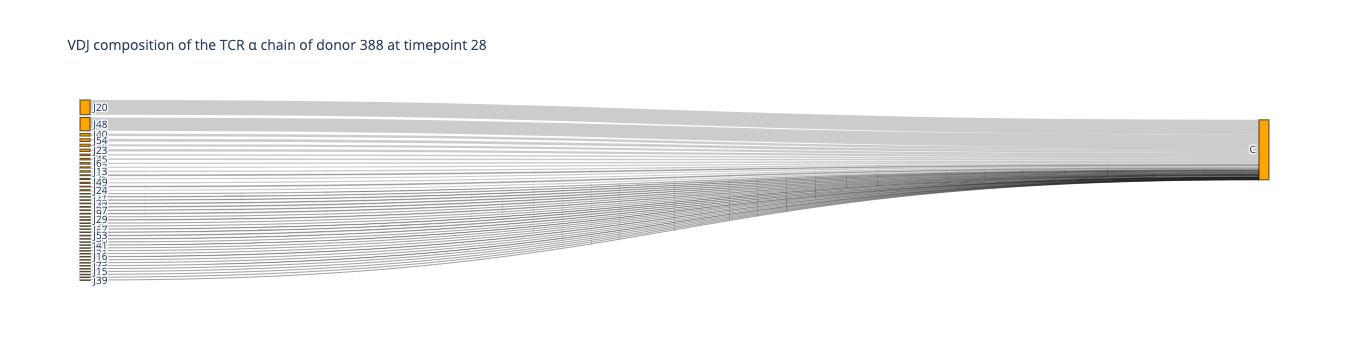

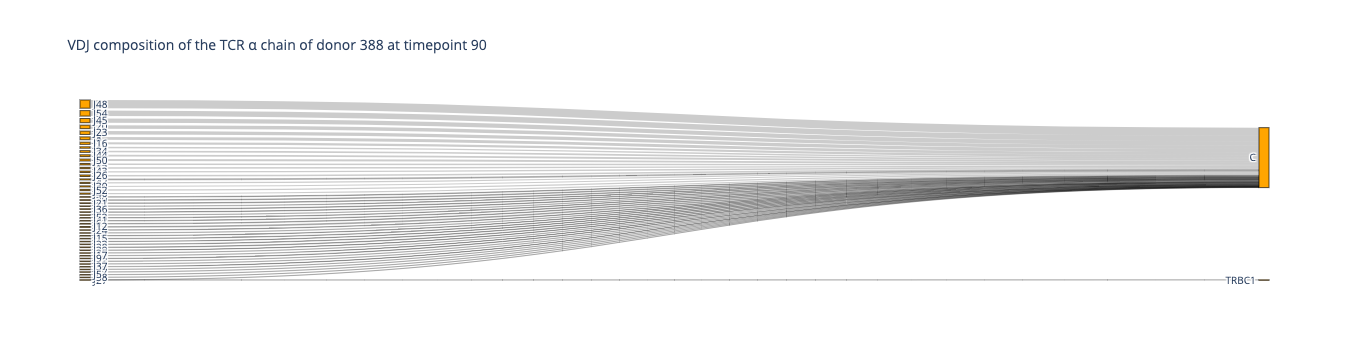

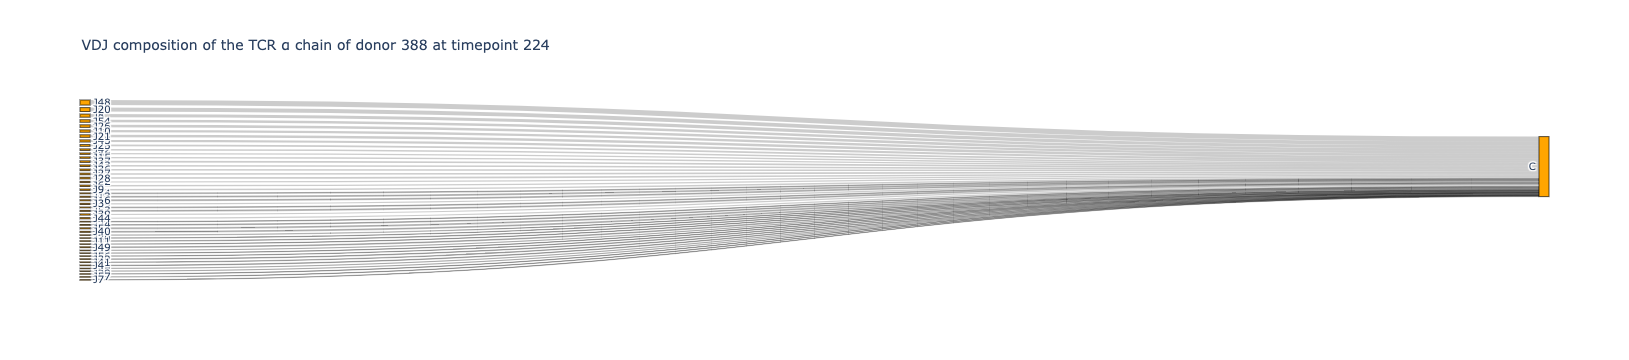

In [152]:
timepoints = ["IP", 0, 14, 28, 90, 224]

for tp in timepoints:
    df = df_all[(df_all["donor"]=="388") & (df_all["chain"]=="TRA") & (df_all["timepoint"]==tp)]
    
    labels, values, targets, sources = get_sankey_arrays(df, receptor="TRA")

    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 5,
          thickness = 10,
          line = dict(color = "black", width = 0.5),
          label = labels,
          color = "orange"
        ),
        link = dict(
          source = sources,
          target = targets,
          value = values
      ))])

    # x_labels = ["V gene", "D gene", "J gene", "C gene"]
    # for i, x_label in enumerate(x_labels):
    #     fig.add_annotation(
    #           x=i,
    #           y=-0.1,
    #           text=x_label,
    #           showarrow=False,
    #           align="center",
    #         font_size=14
    #           )

    fig.update_layout(
        title_text=f"VDJ composition of the TCR α chain of donor 388 at timepoint {tp}", 
        font_size=10,
        )

    fig.write_html(f"figures/TRA_VDJ_sankey_diagram_{tp}.html")

    fig.show()